In [1]:
import pandas as pd
import json
import os
import re

In [2]:
pickle_files = [
    "./data/Sonnet-2.pkl",
    "./data/Sonnet-3.5-2.pkl",
    "./data/gpt-4o-2.pkl",
    "./data/gemini-1.5-pro-2.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df1 = pd.concat(dfs)

df1["prompt"] = "Which letter is being circled?"


pickle_files = [
    "./data/sonnet.pkl",
    "./data/Sonnet-3.5.pkl",
    "./data/gpt-4o.pkl",
    "./data/gemini-1.5-pro.pkl",
]

dfs = [pd.read_pickle(file) for file in pickle_files]
df2 = pd.concat(dfs)

df2["prompt"] = "Which character is being highlighted with a red oval?"

df = pd.concat([df1, df2])

In [3]:
# conver both gt and predicted to lower case
df["gt"] = df["gt"].apply(lambda x: x.lower())
df["predicted"] = df["predicted"].apply(lambda x: x.lower())
df["is_prediction_correct"] = df["gt"] == df["predicted"]

# Group by model and word, then calculate the accuracy
accuracy_per_model_and_word = df.groupby(["Model", "word"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_and_word = accuracy_per_model_and_word * 100
# round 2 decimal places
accuracy_per_model_and_word = accuracy_per_model_and_word.round(2)

print(accuracy_per_model_and_word)

Model           word                
GPT-4o          Acknowledgement         69.03
                Subdermatoglyphic       63.60
                tHyUiKaRbNqWeOpXcZvM    77.92
Gemini-1.5-Pro  Acknowledgement         97.50
                Subdermatoglyphic       91.05
                tHyUiKaRbNqWeOpXcZvM    89.90
Sonnet          Acknowledgement         82.64
                Subdermatoglyphic       71.45
                tHyUiKaRbNqWeOpXcZvM    65.94
Sonnet-3.5      Acknowledgement         91.11
                Subdermatoglyphic       94.49
                tHyUiKaRbNqWeOpXcZvM    82.08
Name: is_prediction_correct, dtype: float64


In [4]:
# count per model and prompt
df.groupby(["Model", "prompt", "word"]).size()

Model           prompt                                                 word                
GPT-4o          Which character is being highlighted with a red oval?  Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
                Which letter is being circled?                         Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
Gemini-1.5-Pro  Which character is being highlighted with a red oval?  Acknowledgement         360
                                                                       Subdermatoglyphic       408
                                                                       tHyUiKaRbNqWeOpXcZvM    480
                W

In [5]:
# count per model and prompt
df.groupby(["Model", "prompt", "word", "gt"]).size()

Model       prompt                                                 word                  gt
GPT-4o      Which character is being highlighted with a red oval?  Acknowledgement       a     24
                                                                                         c     24
                                                                                         d     24
                                                                                         e     72
                                                                                         g     24
                                                                                               ..
Sonnet-3.5  Which letter is being circled?                         tHyUiKaRbNqWeOpXcZvM  v     24
                                                                                         w     24
                                                                                         x     24
                          

In [6]:
# find missing GPT-4o images

df

,word,font_path,circle_index,thickness,scale_factor,padding,x_offset,y_offset,canvas_width,canvas_height,...,model-output-file,model-output-raw,predicted,gt,is_prediction_correct,word_label,Model,fnames,fname,prompt
0,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"The letter ""A"" in the word ""Acknowledgement"" i...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
1,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,50,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the image, the letter ""A"" in the word ""Ackn...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
2,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,100,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
3,Acknowledgement,fonts/Helvetica.ttf,0,4,1.4,200,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,"In the given image, the letter ""A"" in the word...",a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
4,Acknowledgement,fonts/Helvetica.ttf,0,5,1.4,25,0,0,10,2,...,./images_second_prompt/Acknowledgement/text_im...,The character being highlighted with a red ova...,a,a,True,Acknowledgement,Sonnet,NaN,NaN,Which letter is being circled?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,5,1.4,200,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_42f...,The letter **M** is circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1244,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,25,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_141...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1245,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,50,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_8e3...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...
1246,tHyUiKaRbNqWeOpXcZvM,"fonts/OpenSans-VariableFont_wdth,wght.ttf",19,6,1.4,100,0,0,10,2,...,././images/tHyUiKaRbNqWeOpXcZvM/text_image_944...,The letter **M** is being circled. \n,m,m,True,tHyUiKaRbNqWeOpXcZvM,Gemini-1.5-Pro,NaN,NaN,Which character is being highlighted with a re...


In [7]:
df.columns

Index(['word', 'font_path', 'circle_index', 'thickness', 'scale_factor',
       'padding', 'x_offset', 'y_offset', 'canvas_width', 'canvas_height',
       'final_width', 'final_height', 'image_path', 'model-output-file',
       'model-output-raw', 'predicted', 'gt', 'is_prediction_correct',
       'word_label', 'Model', 'fnames', 'fname', 'prompt'],
      dtype='object')

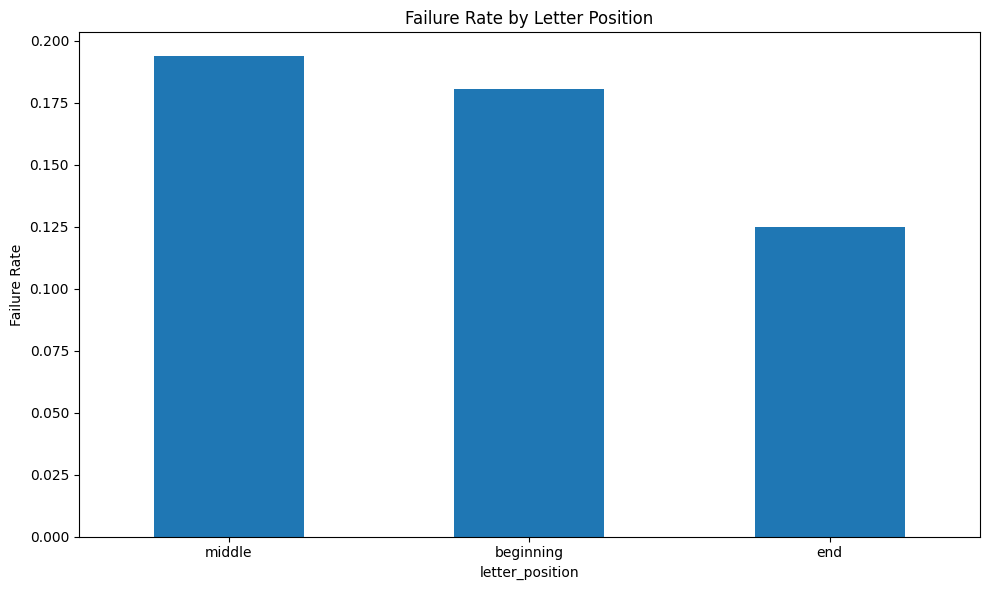

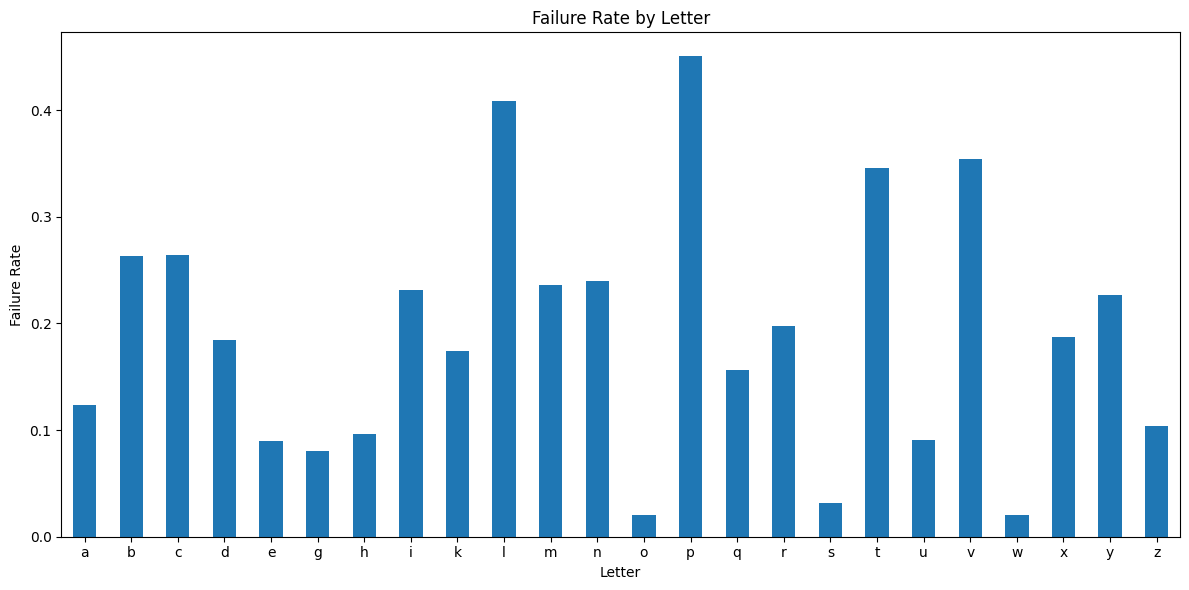

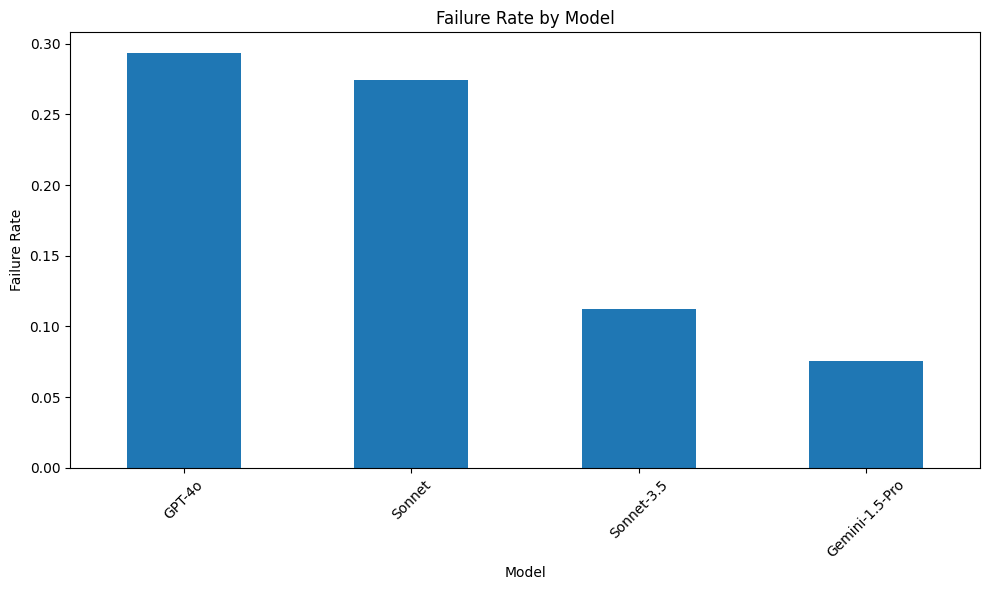

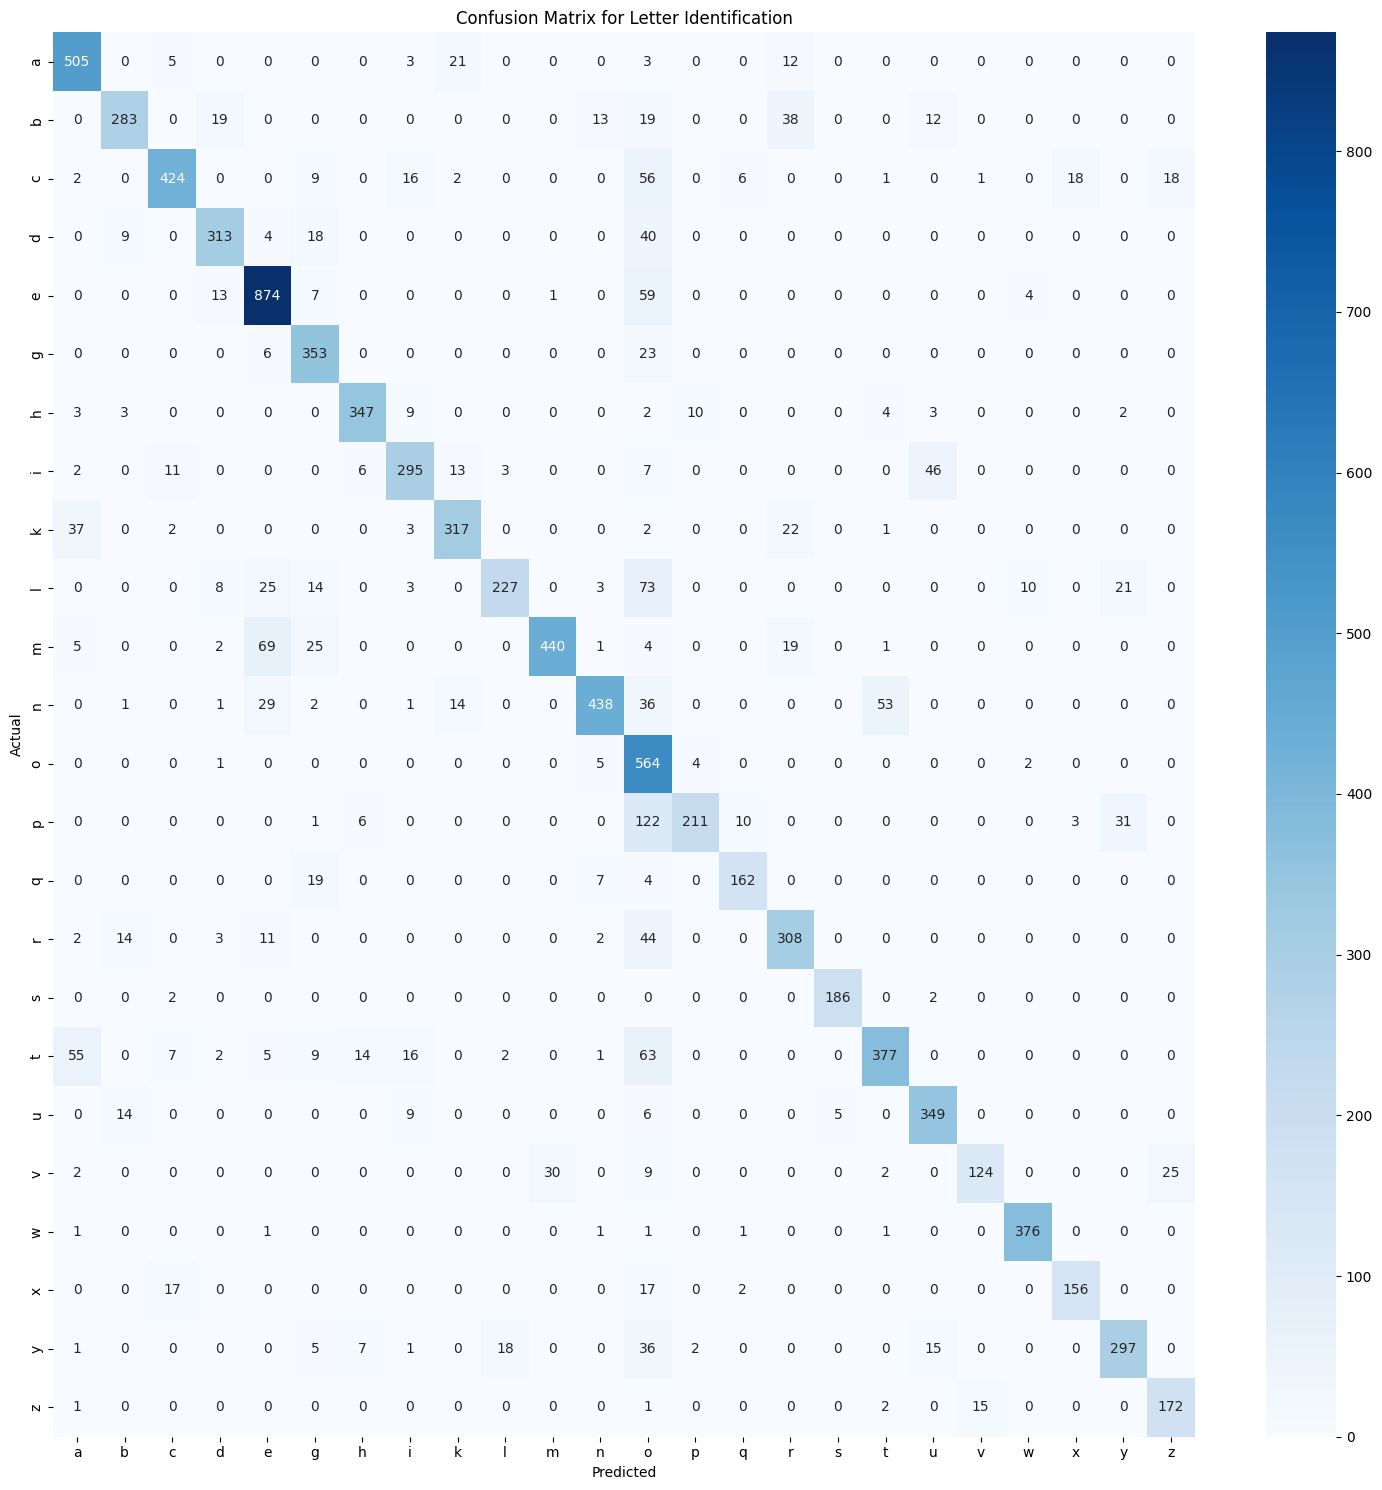

Top 5 most commonly misidentified letters:
gt
p    0.450521
l    0.408854
v    0.354167
t    0.345486
c    0.263889
dtype: float64

Failure rate by letter position:
letter_position
middle       0.193614
beginning    0.180556
end          0.125000
dtype: float64

Failure rate by model:
Model
GPT-4o            0.293269
Sonnet            0.274439
Sonnet-3.5        0.112580
Gemini-1.5-Pro    0.075321
dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame


def get_letter_position(word, index):
    if index == 0:
        return "beginning"
    elif index == len(word) - 1:
        return "end"
    else:
        return "middle"


# Add a column for letter position
df["letter_position"] = df.apply(
    lambda row: get_letter_position(row["word"], row["circle_index"]), axis=1
)

# Analysis 1: Failure rate by letter position
position_failure = (
    df[df["is_prediction_correct"] == False].groupby("letter_position").size()
    / df.groupby("letter_position").size()
)
position_failure = position_failure.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
position_failure.plot(kind="bar")
plt.title("Failure Rate by Letter Position")
plt.ylabel("Failure Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Analysis 2: Most commonly misidentified letters
letter_failure = (
    df[df["is_prediction_correct"] == False]
    .groupby("gt")
    .size()
    .sort_values(ascending=False)
)
letter_failure_rate = letter_failure / df.groupby("gt").size()

plt.figure(figsize=(12, 6))
letter_failure_rate.plot(kind="bar")
plt.title("Failure Rate by Letter")
plt.ylabel("Failure Rate")
plt.xlabel("Letter")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Analysis 3: Failure rate by model
model_failure = (
    df[df["is_prediction_correct"] == False].groupby("Model").size()
    / df.groupby("Model").size()
)
model_failure = model_failure.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
model_failure.plot(kind="bar")
plt.title("Failure Rate by Model")
plt.ylabel("Failure Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis 4: Confusion matrix for misidentified letters
from sklearn.metrics import confusion_matrix
import seaborn as sns

letters = sorted(df["gt"].unique())
cm = confusion_matrix(df["gt"], df["predicted"], labels=letters)
plt.figure(figsize=(15, 15))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=letters, yticklabels=letters
)
plt.title("Confusion Matrix for Letter Identification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Print some summary statistics
print("Top 5 most commonly misidentified letters:")
print(letter_failure_rate.nlargest(5))

print("\nFailure rate by letter position:")
print(position_failure)

print("\nFailure rate by model:")
print(model_failure)

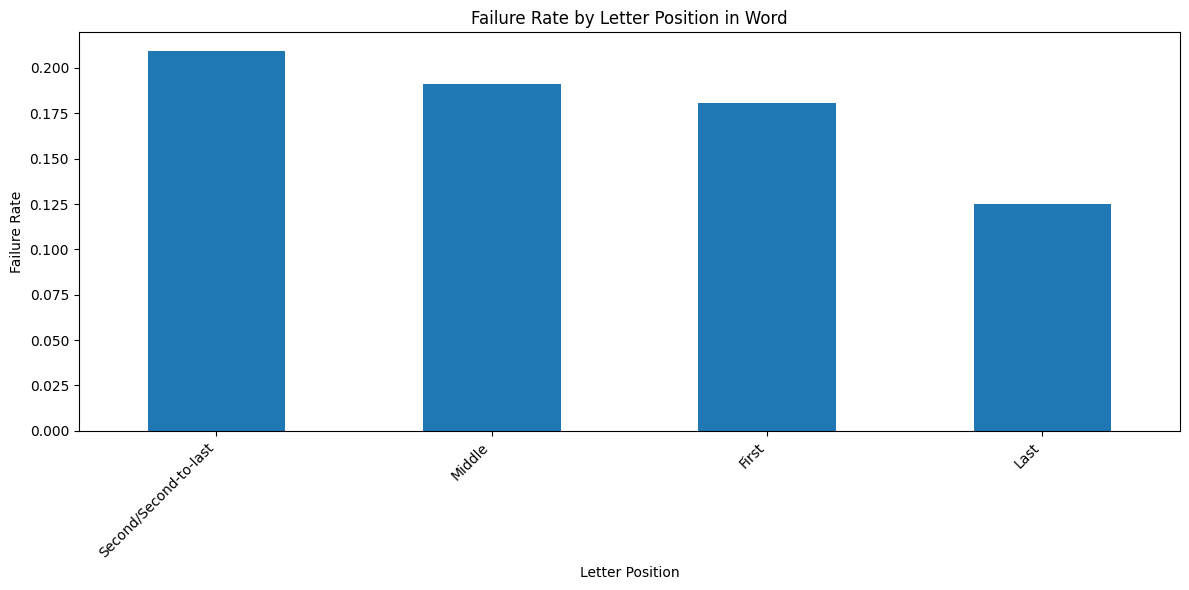

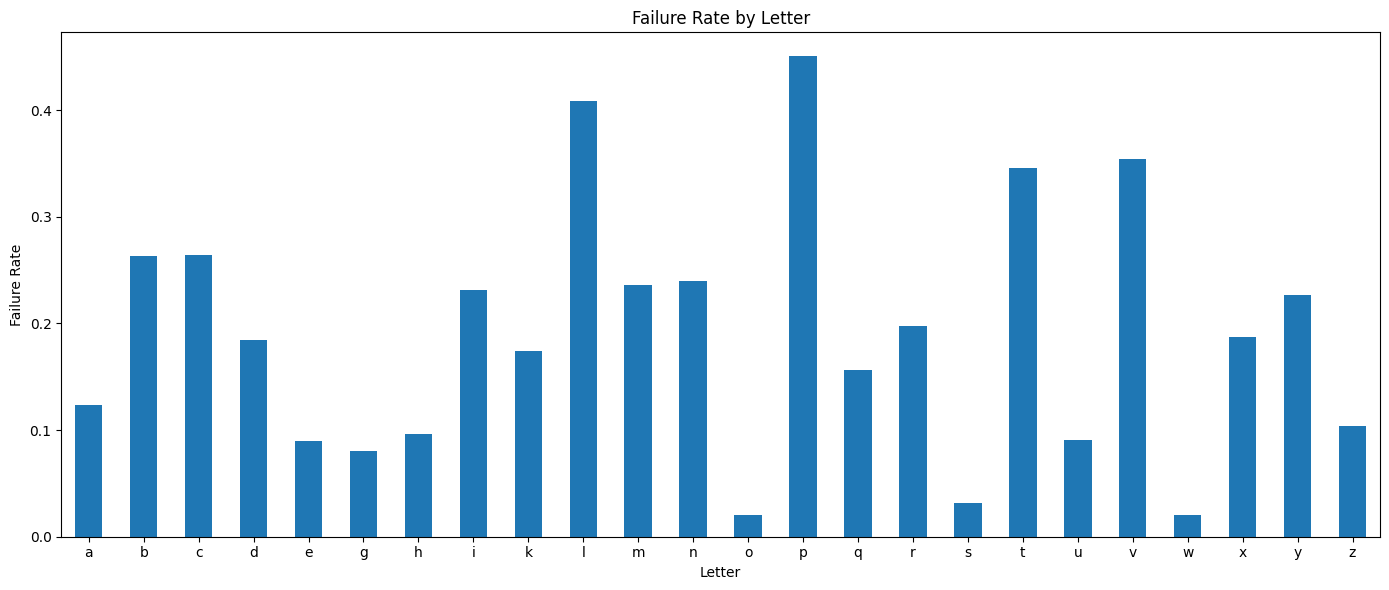

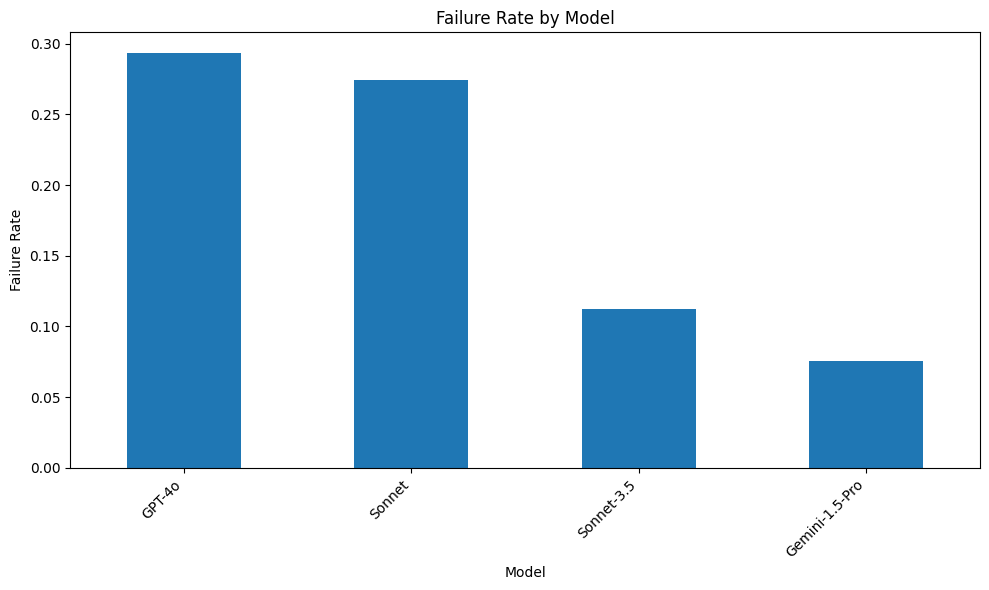

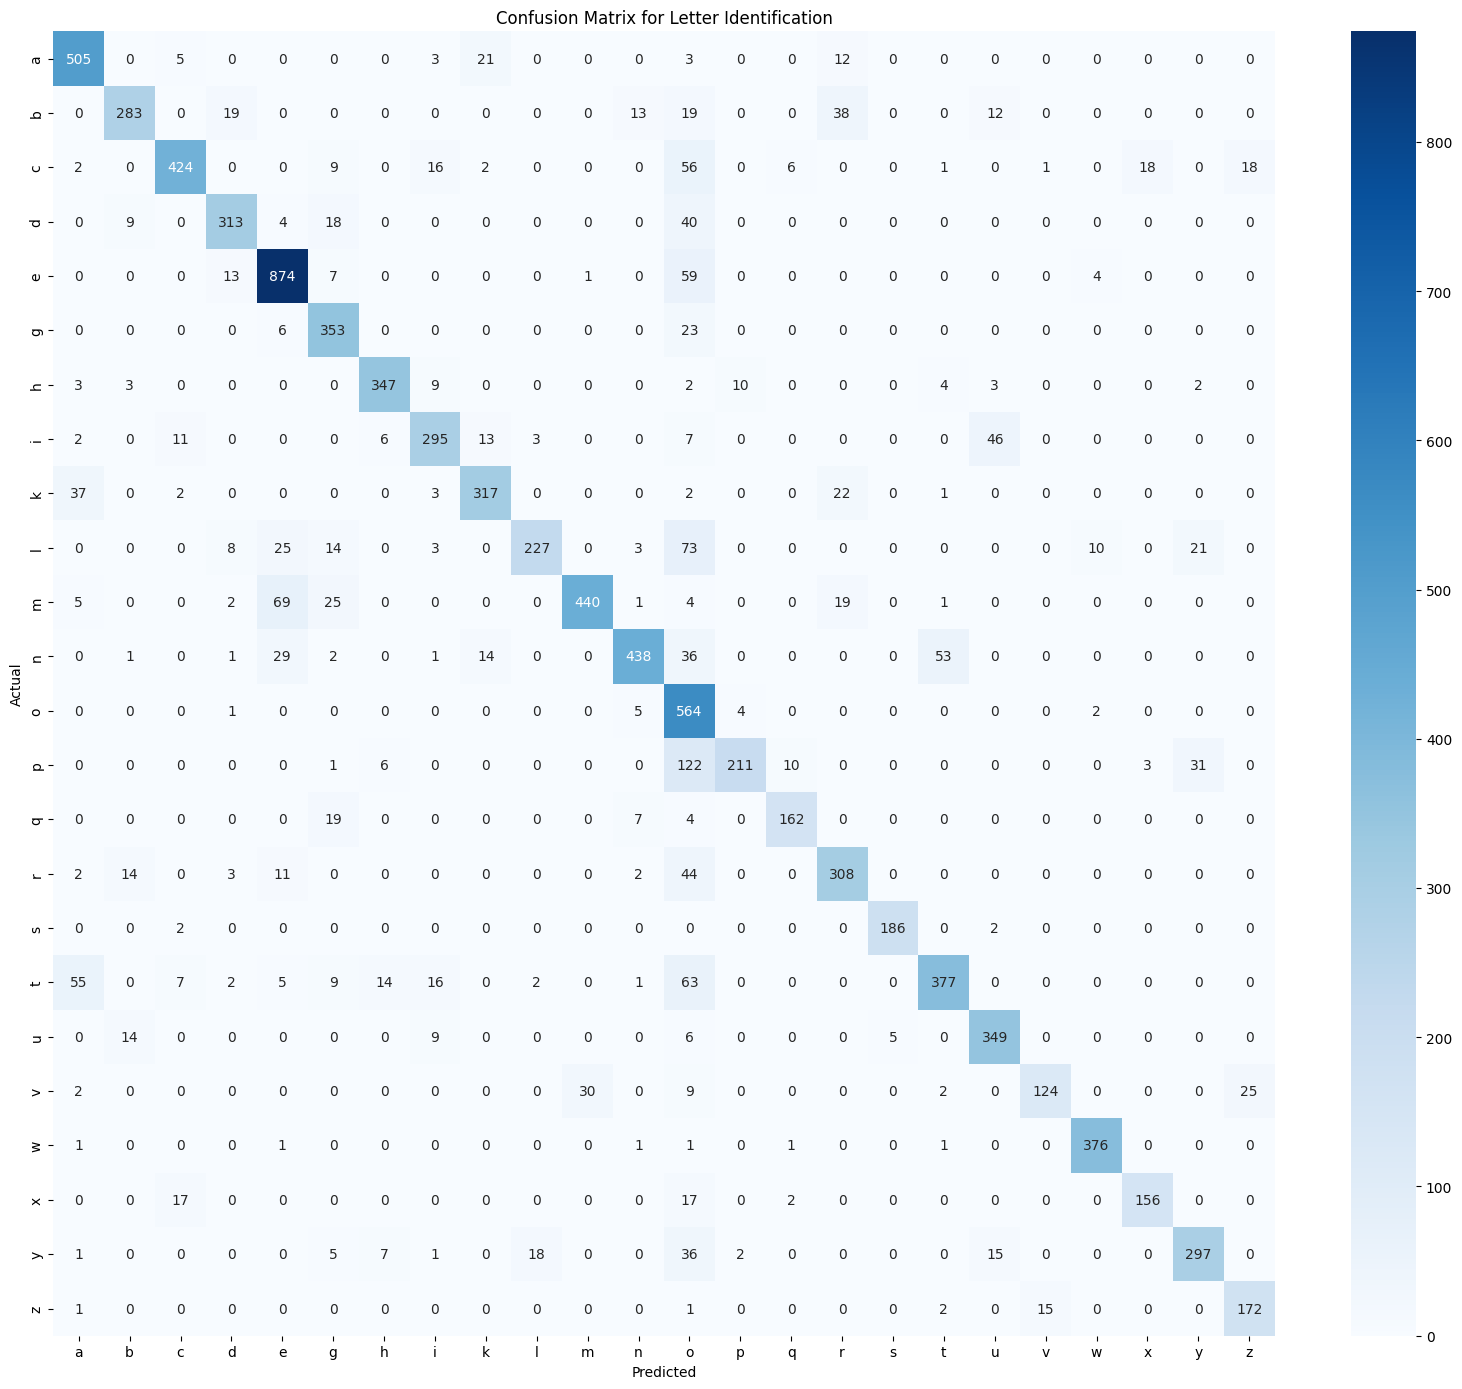

Top 5 most commonly misidentified letters:
gt
p    0.450521
l    0.408854
v    0.354167
t    0.345486
c    0.263889
dtype: float64

Failure rate by letter position:
letter_position
Second/Second-to-last    0.209201
Middle                   0.191276
First                    0.180556
Last                     0.125000
dtype: float64

Failure rate by model:
Model
GPT-4o            0.293269
Sonnet            0.274439
Sonnet-3.5        0.112580
Gemini-1.5-Pro    0.075321
dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def get_letter_position(word, index):
    word_length = len(word)
    if index == 0:
        return "First"
    elif index == word_length - 1:
        return "Last"
    elif word_length <= 3:
        return "Middle (short word)"
    elif index == 1 or index == word_length - 2:
        return "Second/Second-to-last"
    else:
        return "Middle"


# Add a column for letter position
df["letter_position"] = df.apply(
    lambda row: get_letter_position(row["word"], row["circle_index"]), axis=1
)

# Analysis 1: Failure rate by letter position
position_failure = (
    df[df["is_prediction_correct"] == False].groupby("letter_position").size()
    / df.groupby("letter_position").size()
)
position_failure = position_failure.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
position_failure.plot(kind="bar")
plt.title("Failure Rate by Letter Position in Word")
plt.ylabel("Failure Rate")
plt.xlabel("Letter Position")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Analysis 2: Most commonly misidentified letters
letter_failure = (
    df[df["is_prediction_correct"] == False]
    .groupby("gt")
    .size()
    .sort_values(ascending=False)
)
letter_failure_rate = letter_failure / df.groupby("gt").size()

plt.figure(figsize=(14, 6))
letter_failure_rate.plot(kind="bar")
plt.title("Failure Rate by Letter")
plt.ylabel("Failure Rate")
plt.xlabel("Letter")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Analysis 3: Failure rate by model
model_failure = (
    df[df["is_prediction_correct"] == False].groupby("Model").size()
    / df.groupby("Model").size()
)
model_failure = model_failure.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
model_failure.plot(kind="bar")
plt.title("Failure Rate by Model")
plt.ylabel("Failure Rate")
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Analysis 4: Confusion matrix for misidentified letters
from sklearn.metrics import confusion_matrix

letters = sorted(df["gt"].unique())
cm = confusion_matrix(df["gt"], df["predicted"], labels=letters)
plt.figure(figsize=(16, 14))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=letters, yticklabels=letters
)
plt.title("Confusion Matrix for Letter Identification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Print some summary statistics
print("Top 5 most commonly misidentified letters:")
print(letter_failure_rate.nlargest(5))

print("\nFailure rate by letter position:")
print(position_failure)

print("\nFailure rate by model:")
print(model_failure)

In [11]:
df.columns

Index(['word', 'font_path', 'circle_index', 'thickness', 'scale_factor',
       'padding', 'x_offset', 'y_offset', 'canvas_width', 'canvas_height',
       'final_width', 'final_height', 'image_path', 'model-output-file',
       'model-output-raw', 'predicted', 'gt', 'is_prediction_correct',
       'word_label', 'Model', 'fnames', 'fname', 'prompt', 'letter_position'],
      dtype='object')

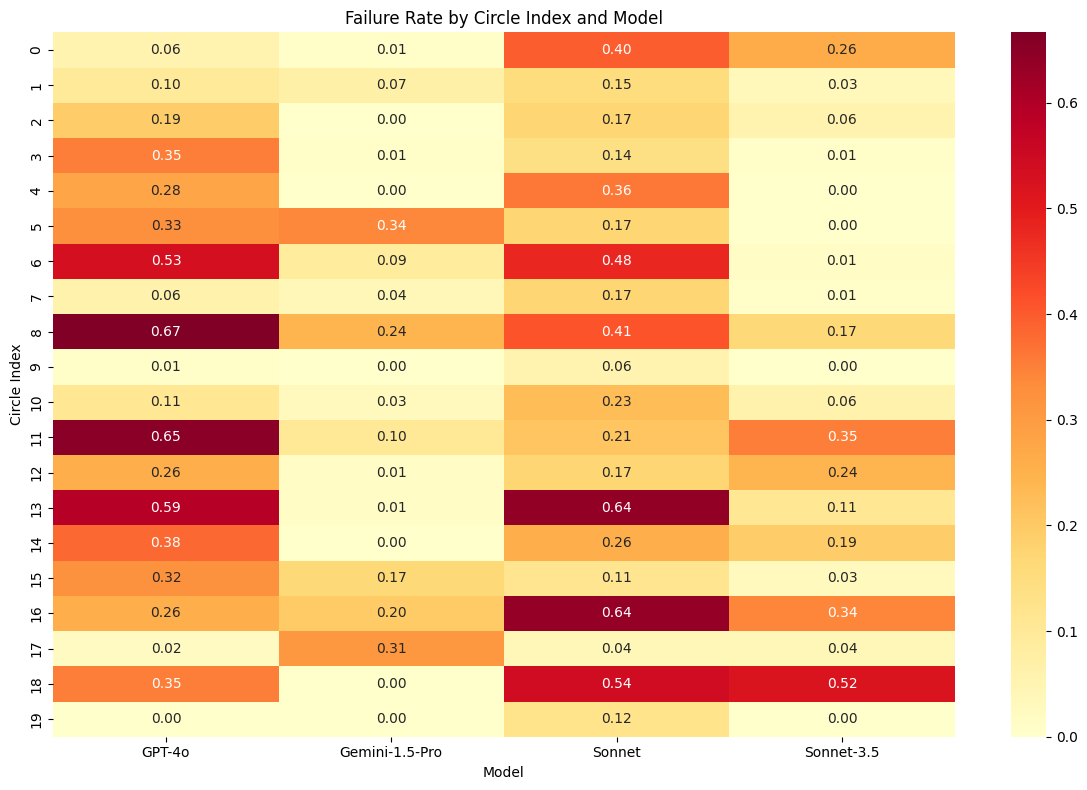

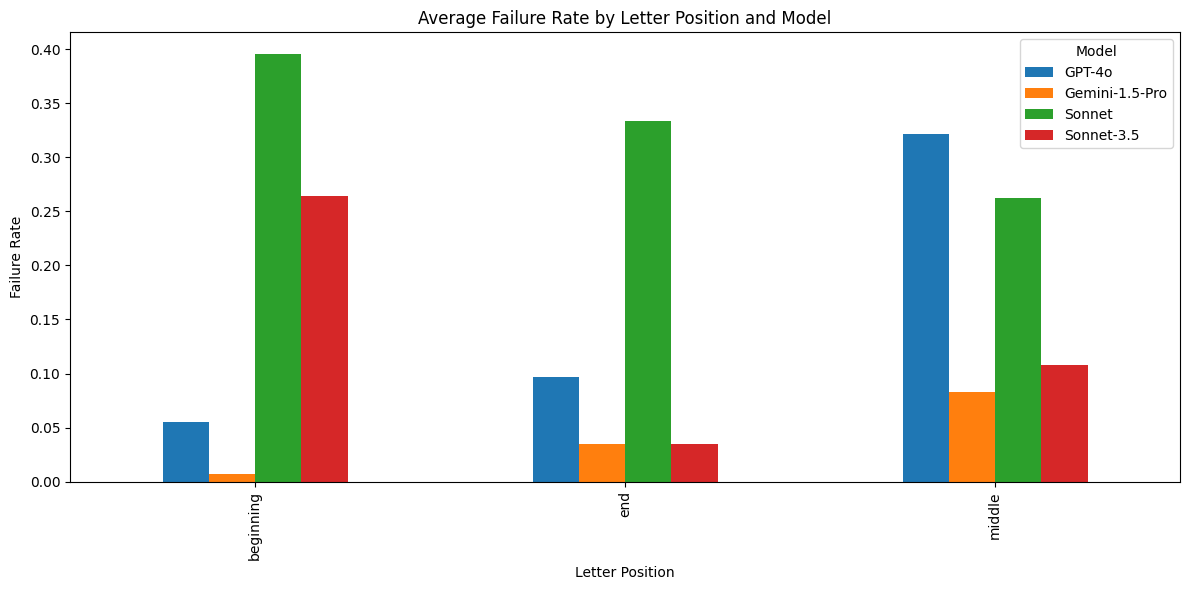

Top 5 highest failure rates by circle_index and model:
circle_index  Model 
8             GPT-4o    0.666667
11            GPT-4o    0.652778
13            Sonnet    0.638889
16            Sonnet    0.635417
13            GPT-4o    0.590278
dtype: float64

Average failure rate by position and model:
Model        GPT-4o  Gemini-1.5-Pro    Sonnet  Sonnet-3.5
position                                                 
beginning  0.055556        0.006944  0.395833    0.263889
end        0.097222        0.034722  0.333333    0.034722
middle     0.321558        0.082428  0.262681    0.107790


In [12]:
# Analysis of failure patterns based on circle_index and model
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate failure rate for each circle_index and model
failure_rate = (
    df.groupby(["Model", "circle_index"])["is_prediction_correct"]
    .apply(lambda x: 1 - x.mean())
    .reset_index()
)
failure_rate = failure_rate.pivot(
    index="circle_index", columns="Model", values="is_prediction_correct"
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(failure_rate, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Failure Rate by Circle Index and Model")
plt.xlabel("Model")
plt.ylabel("Circle Index")
plt.tight_layout()
plt.show()

# Calculate average failure rate for each position (beginning, middle, end)
df["position"] = df.apply(
    lambda row: (
        "beginning"
        if row["circle_index"] == 0
        else "end" if row["circle_index"] == len(row["word"]) - 1 else "middle"
    ),
    axis=1,
)

position_failure_rate = (
    df.groupby(["Model", "position"])["is_prediction_correct"]
    .apply(lambda x: 1 - x.mean())
    .reset_index()
)
position_failure_rate = position_failure_rate.pivot(
    index="position", columns="Model", values="is_prediction_correct"
)

# Plot bar chart
position_failure_rate.plot(kind="bar", figsize=(12, 6))
plt.title("Average Failure Rate by Letter Position and Model")
plt.xlabel("Letter Position")
plt.ylabel("Failure Rate")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# Print summary statistics
print("Top 5 highest failure rates by circle_index and model:")
print(failure_rate.stack().nlargest(5))

print("\nAverage failure rate by position and model:")
print(position_failure_rate)

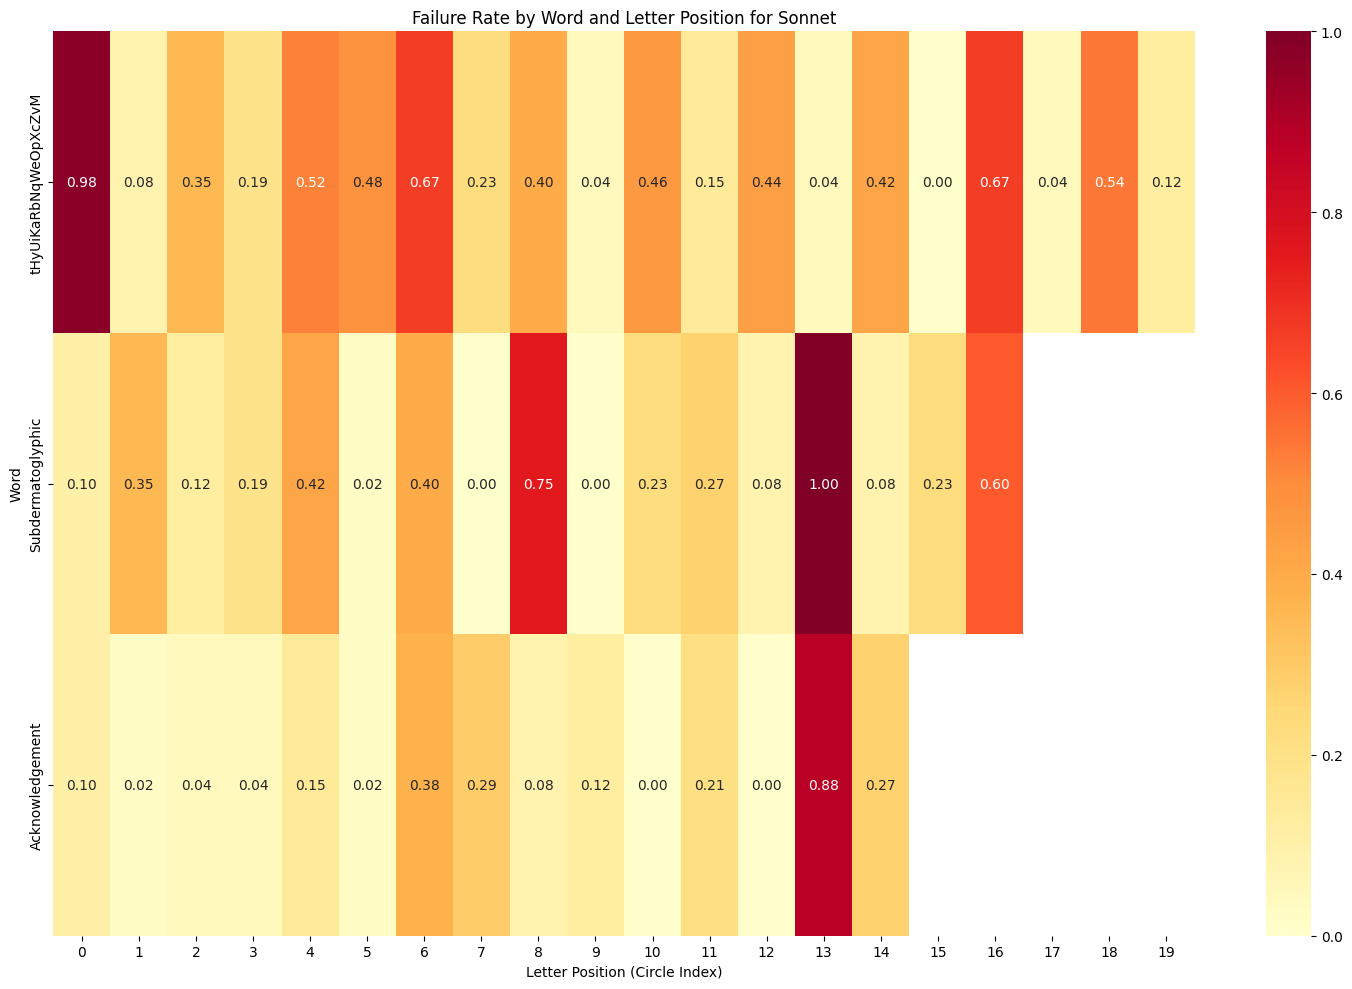

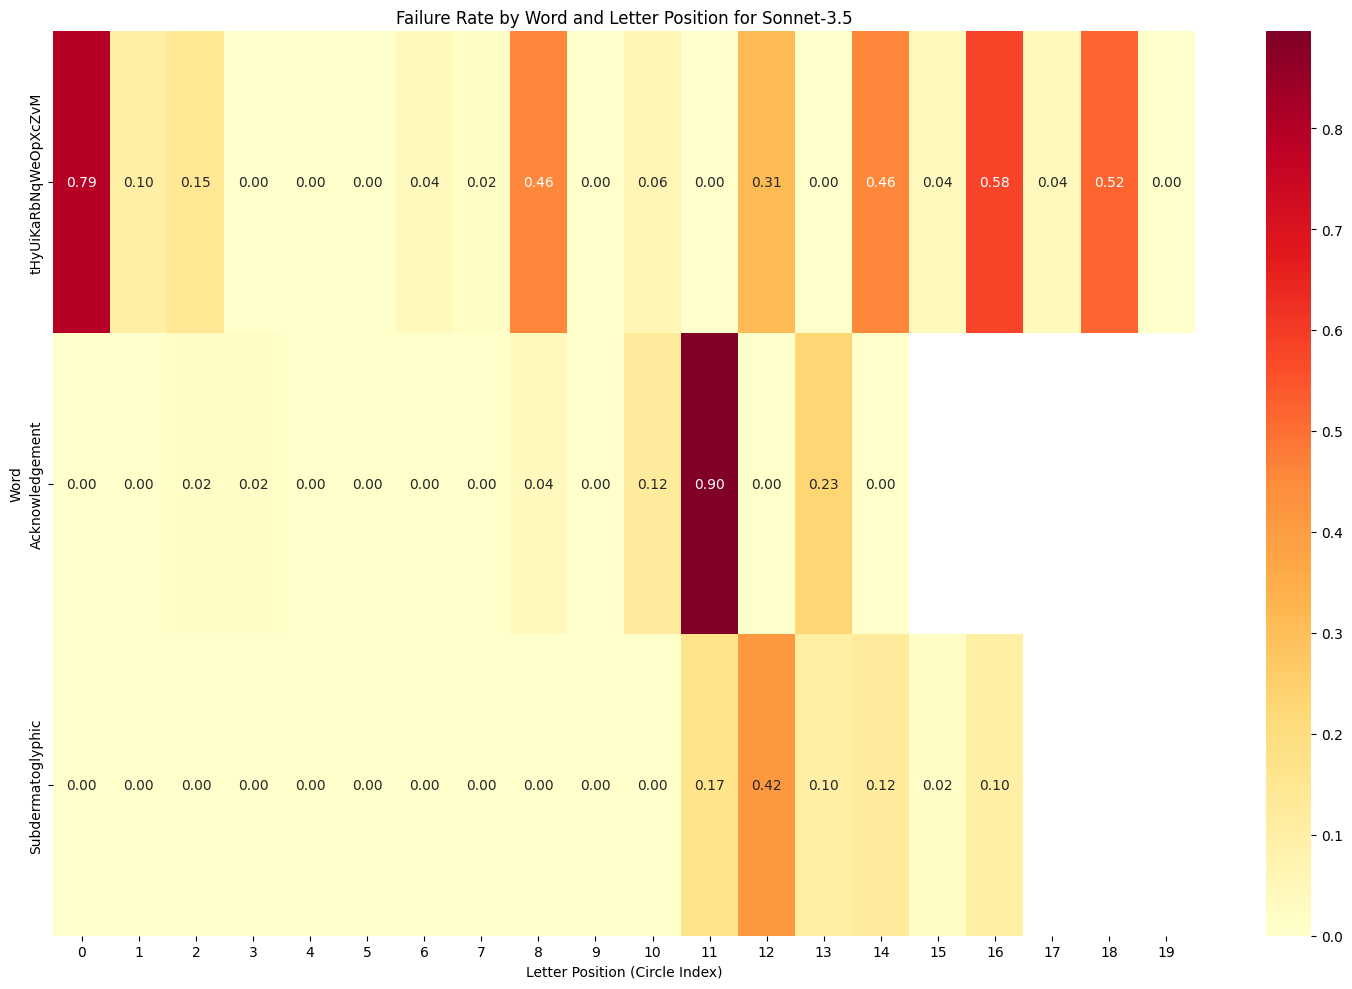

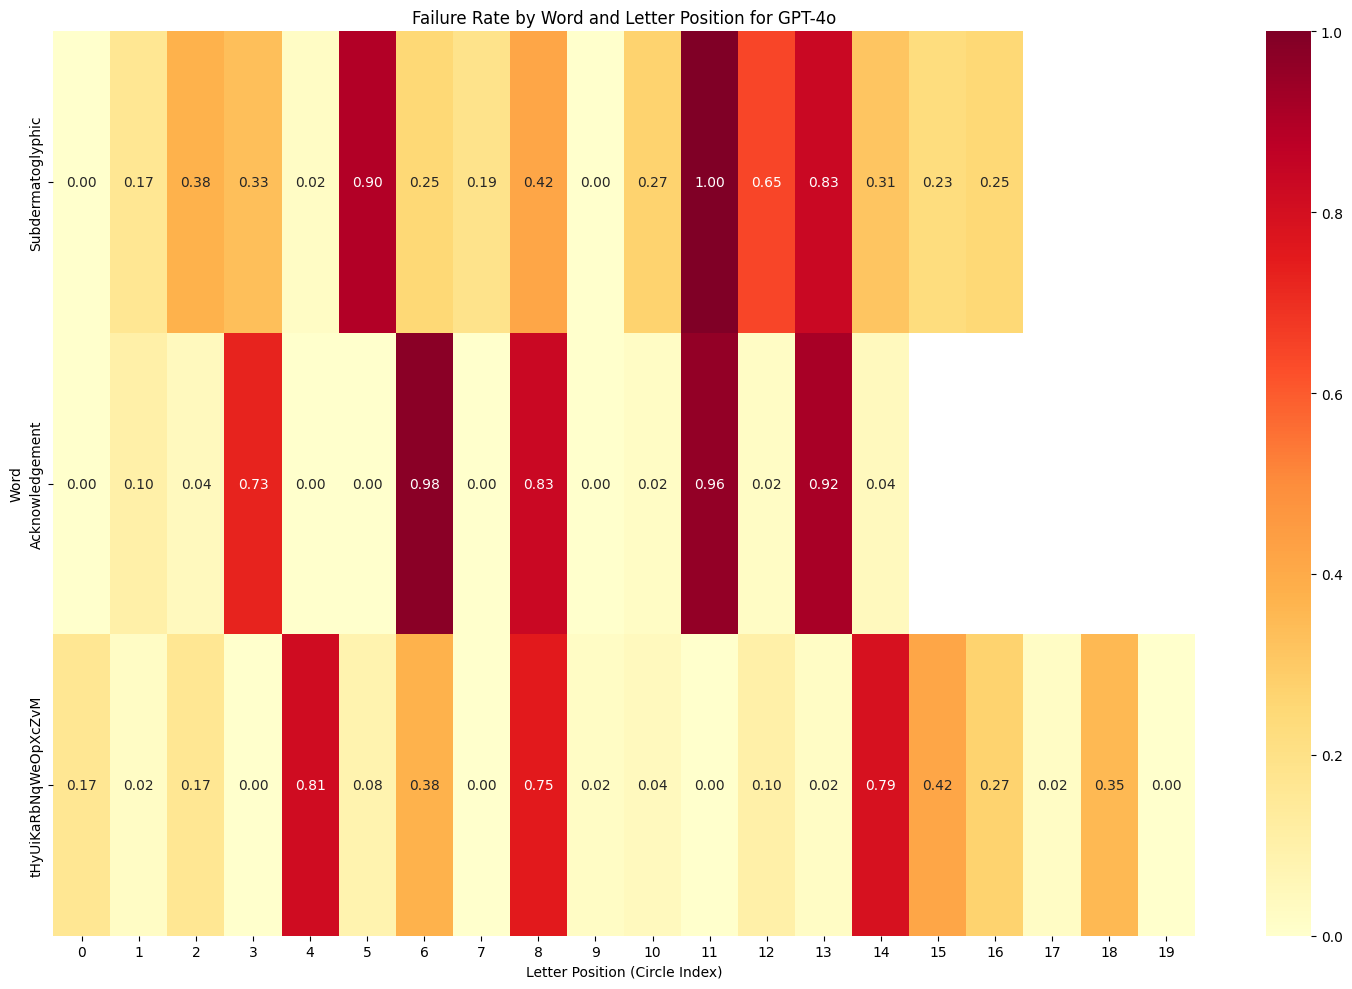

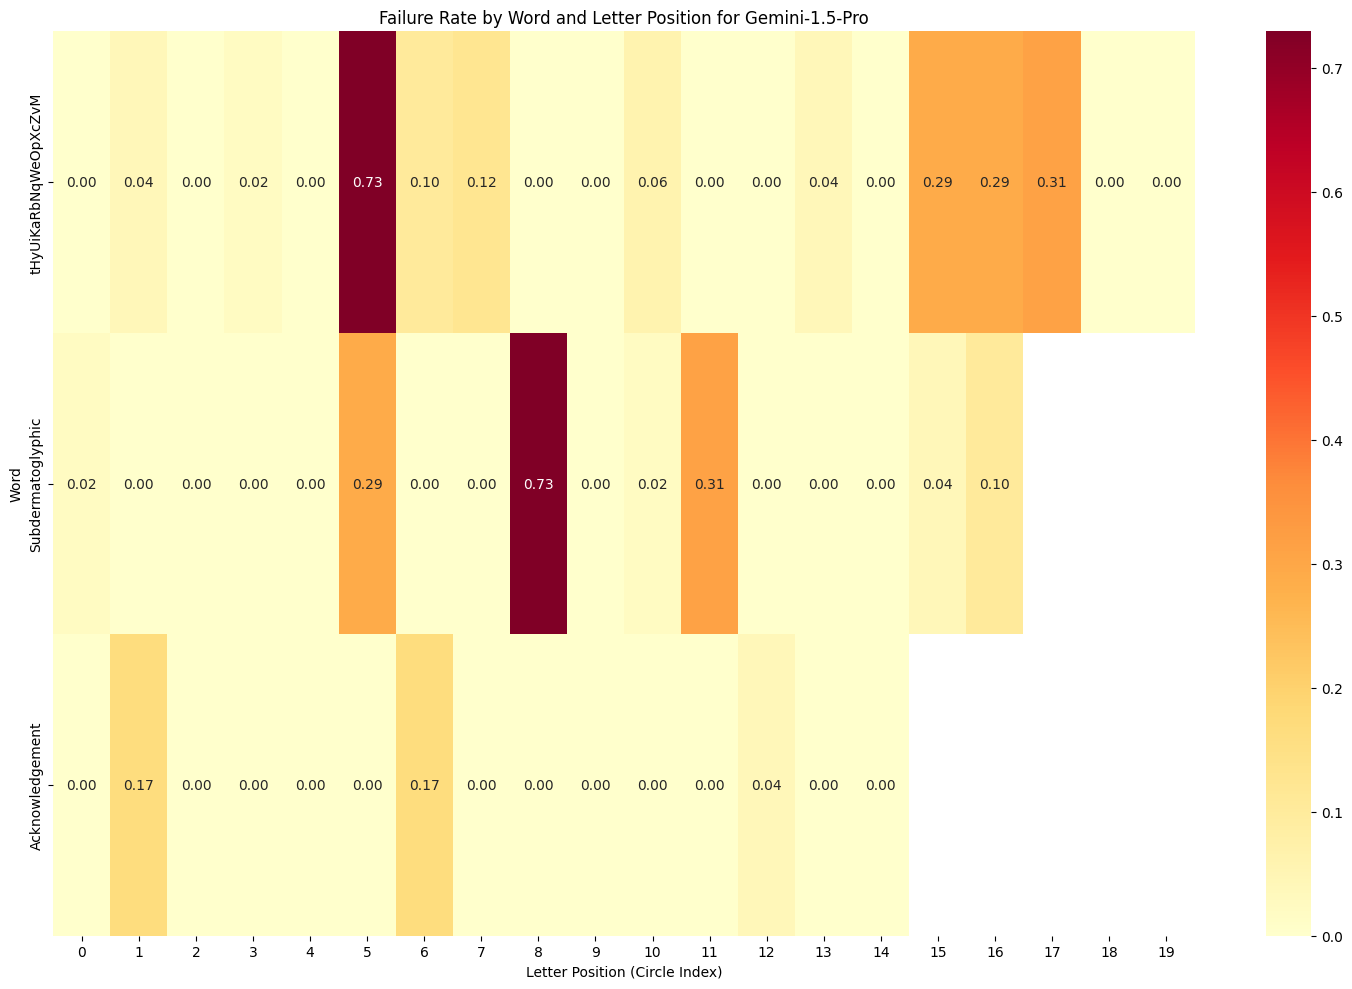

Top 10 words with highest average failure rates across all models:
word
tHyUiKaRbNqWeOpXcZvM    0.210417
Subdermatoglyphic       0.198529
Acknowledgement         0.149306
dtype: float64

Top 20 highest failure rates by model, word, and letter position:
Model           word                  circle_index
GPT-4o          Subdermatoglyphic     11              1.000000
Sonnet          Subdermatoglyphic     13              1.000000
                tHyUiKaRbNqWeOpXcZvM  0               0.979167
GPT-4o          Acknowledgement       6               0.979167
                                      11              0.958333
                                      13              0.916667
                Subdermatoglyphic     5               0.895833
Sonnet-3.5      Acknowledgement       11              0.895833
Sonnet          Acknowledgement       13              0.875000
GPT-4o          Subdermatoglyphic     13              0.833333
                Acknowledgement       8               0.833333
   

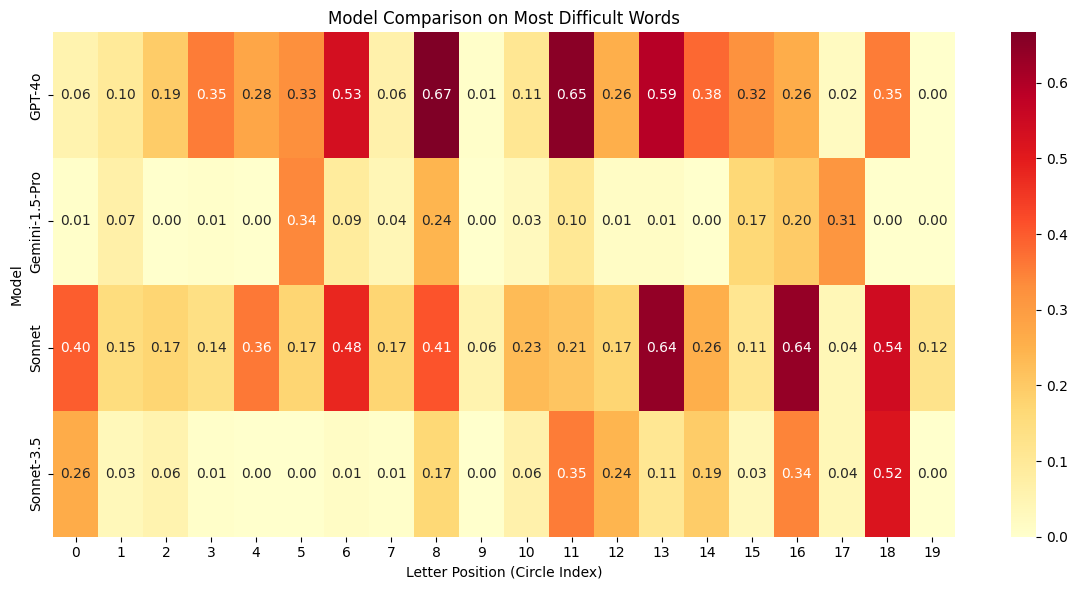

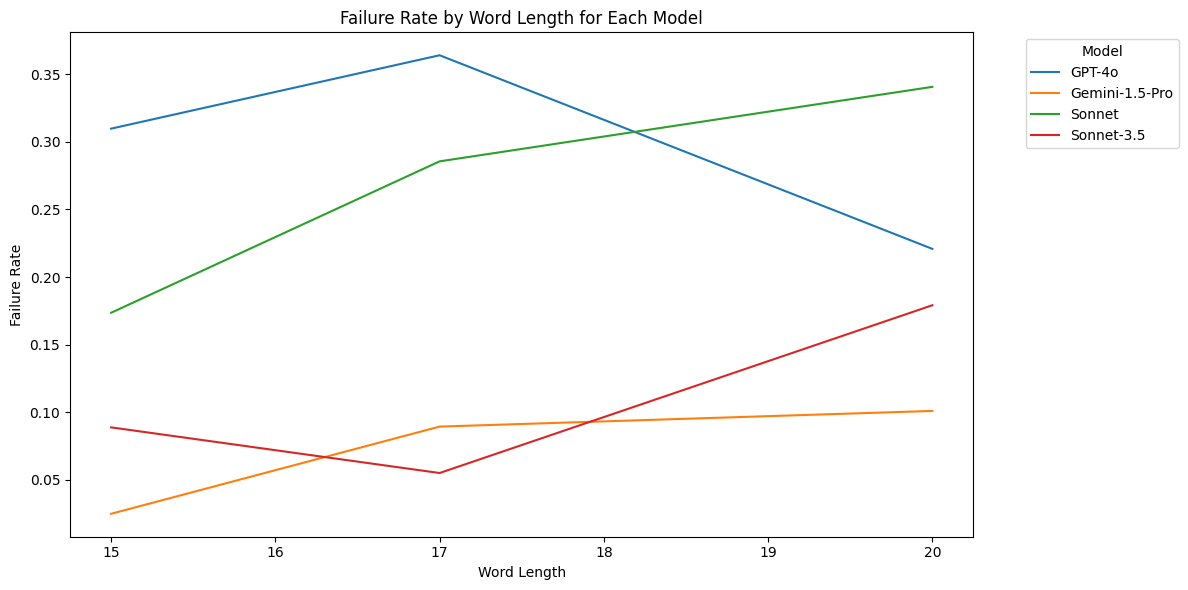

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate failure rate for each combination of model, word, and circle_index
failure_rate = (
    df.groupby(["Model", "word", "circle_index"])["is_prediction_correct"]
    .apply(lambda x: 1 - x.mean())
    .reset_index()
)

# Pivot the data to create a matrix of failure rates
pivot_failure_rate = failure_rate.pivot(
    index=["Model", "word"], columns="circle_index", values="is_prediction_correct"
)

# Sort the pivot table by the average failure rate across all circle_indexes
pivot_failure_rate["avg_failure"] = pivot_failure_rate.mean(axis=1)
pivot_failure_rate = pivot_failure_rate.sort_values("avg_failure", ascending=False)
pivot_failure_rate = pivot_failure_rate.drop("avg_failure", axis=1)

# Plot heatmap for each model
for model in df["Model"].unique():
    model_data = pivot_failure_rate.loc[model]

    plt.figure(figsize=(15, 10))
    sns.heatmap(model_data, annot=True, cmap="YlOrRd", fmt=".2f")
    plt.title(f"Failure Rate by Word and Letter Position for {model}")
    plt.xlabel("Letter Position (Circle Index)")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

# Identify words with highest average failure rates across all models
avg_failure_by_word = (
    pivot_failure_rate.groupby("word").mean().mean(axis=1).sort_values(ascending=False)
)
print("Top 10 words with highest average failure rates across all models:")
print(avg_failure_by_word.head(10))

# Identify specific model-word combinations with highest failure rates
highest_failures = pivot_failure_rate.stack().nlargest(20)
print("\nTop 20 highest failure rates by model, word, and letter position:")
print(highest_failures)

# Compare models' performance on the most difficult words
difficult_words = avg_failure_by_word.head(10).index
model_comparison = (
    pivot_failure_rate.loc[(slice(None), difficult_words), :].groupby("Model").mean()
)

plt.figure(figsize=(12, 6))
sns.heatmap(model_comparison, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Model Comparison on Most Difficult Words")
plt.xlabel("Letter Position (Circle Index)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# Analyze the relationship between word length and failure rate
df["word_length"] = df["word"].str.len()
length_failure_rate = (
    df.groupby(["Model", "word_length"])["is_prediction_correct"]
    .apply(lambda x: 1 - x.mean())
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    x="word_length", y="is_prediction_correct", hue="Model", data=length_failure_rate
)
plt.title("Failure Rate by Word Length for Each Model")
plt.xlabel("Word Length")
plt.ylabel("Failure Rate")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

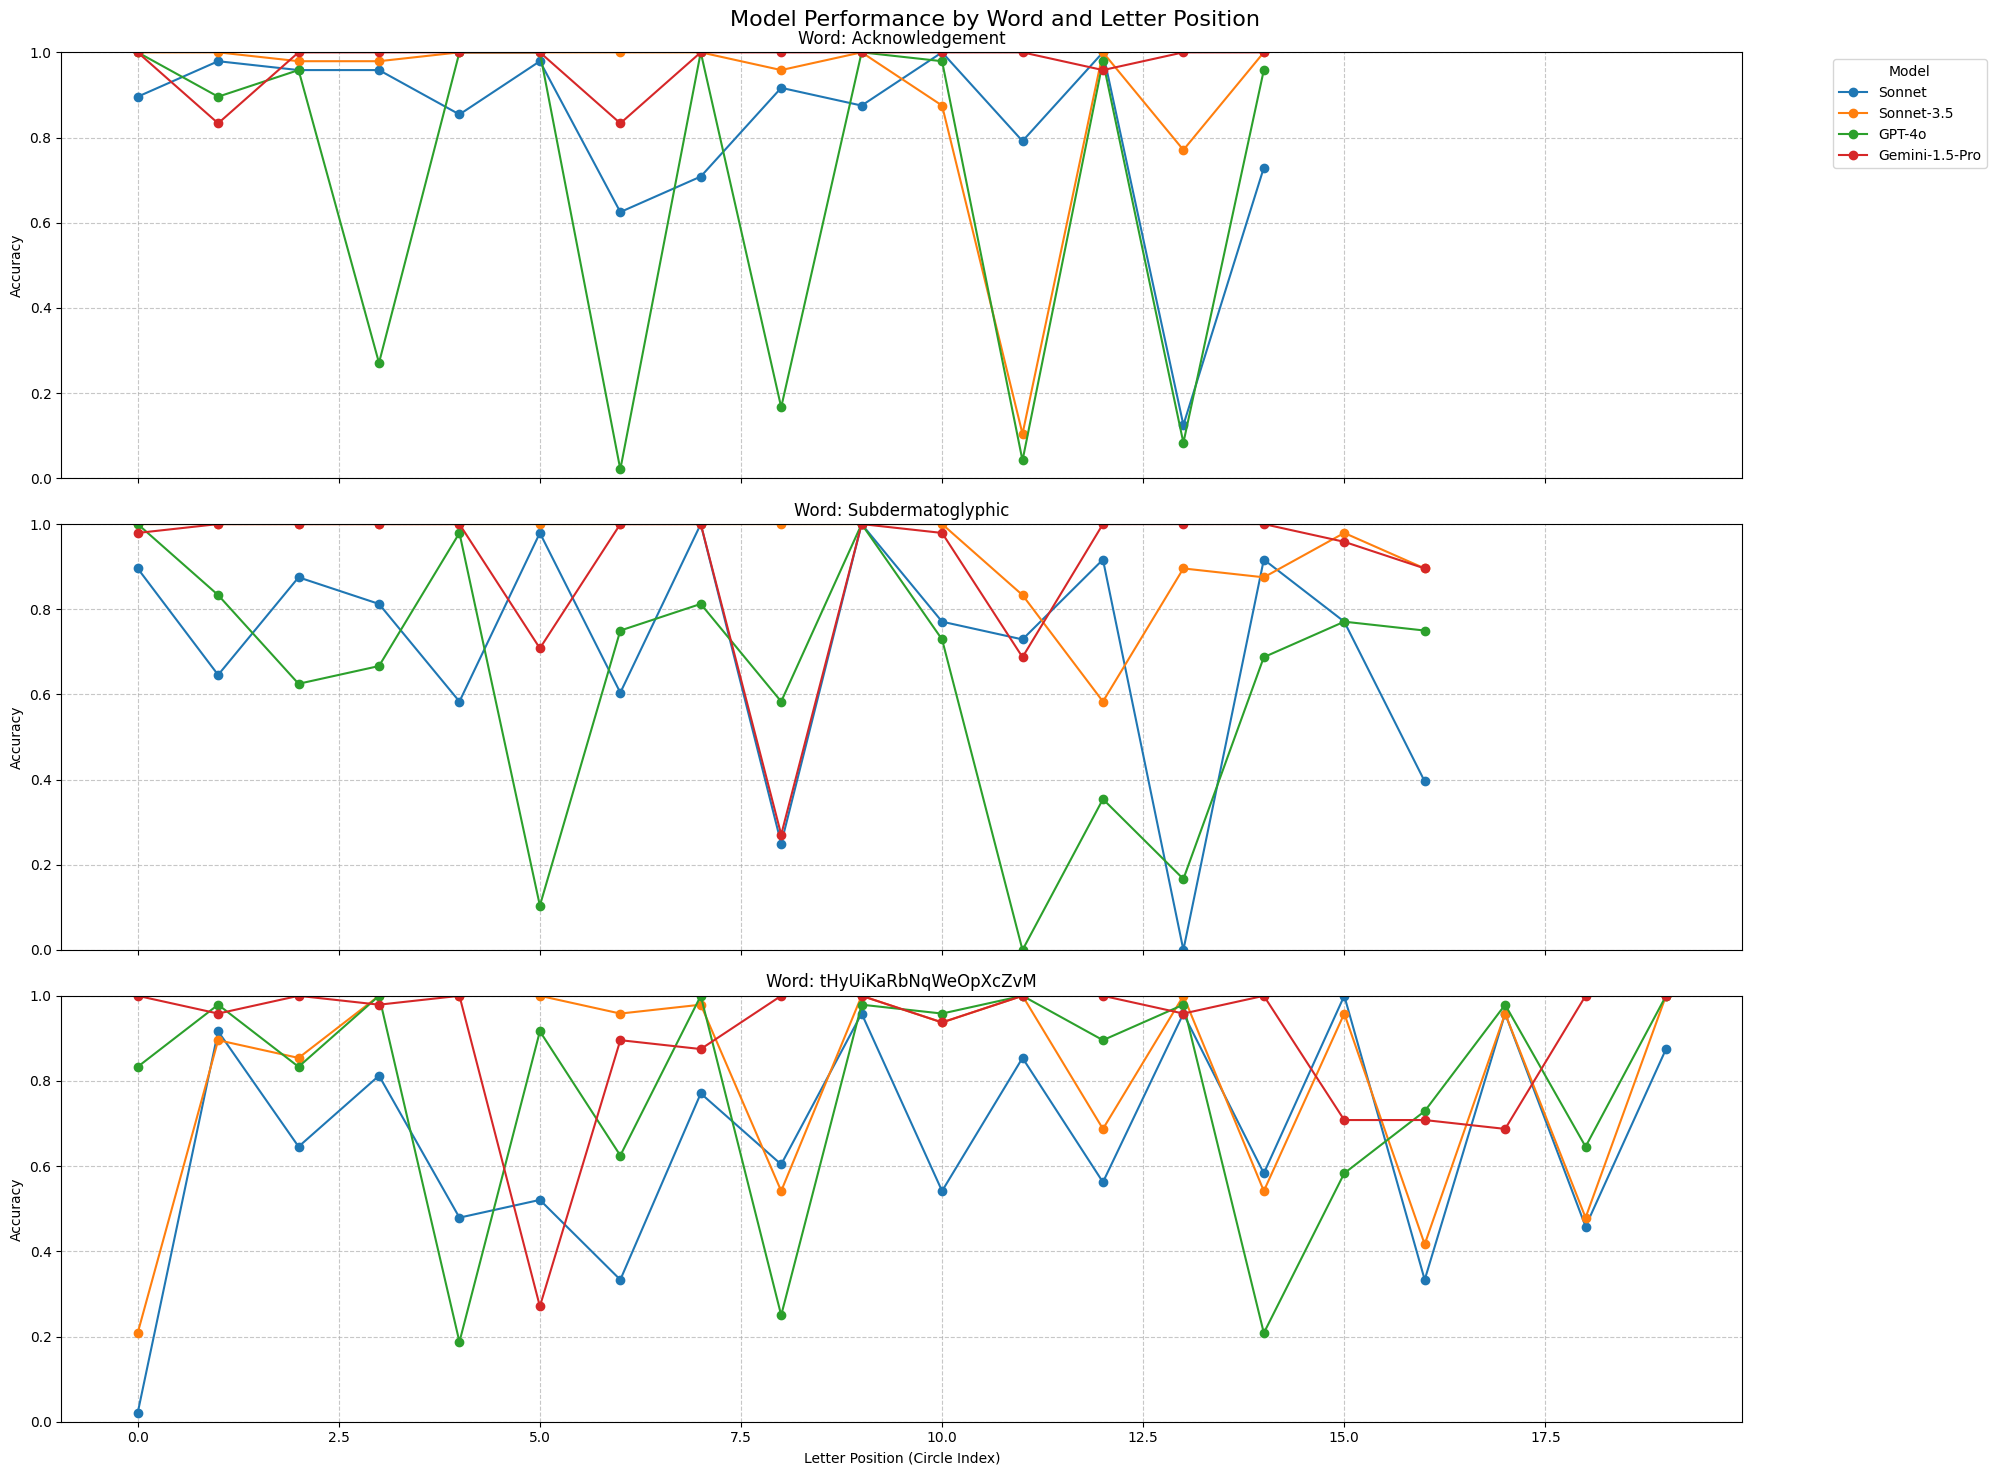

Top 5 most challenging words (lowest average accuracy across all models and positions):
word
tHyUiKaRbNqWeOpXcZvM    0.789583
Subdermatoglyphic       0.801471
Acknowledgement         0.850694
Name: is_prediction_correct, dtype: float64

Top 5 easiest words (highest average accuracy across all models and positions):
word
tHyUiKaRbNqWeOpXcZvM    0.789583
Subdermatoglyphic       0.801471
Acknowledgement         0.850694
Name: is_prediction_correct, dtype: float64

Model performance summary:
Model
Gemini-1.5-Pro    0.924679
Sonnet-3.5        0.887420
Sonnet            0.725561
GPT-4o            0.706731
Name: is_prediction_correct, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate accuracy rate for each combination of model, word, and circle_index
accuracy_rate = (
    df.groupby(["Model", "word", "circle_index"])["is_prediction_correct"]
    .mean()
    .reset_index()
)

# Get unique words and models
words = df["word"].unique()
models = df["Model"].unique()

# Set up the plot
n_words = len(words)
n_models = len(models)
fig, axes = plt.subplots(n_words, 1, figsize=(20, 5 * n_words), sharex=True)
fig.suptitle("Model Performance by Word and Letter Position", fontsize=16)

# Plot for each word
for i, word in enumerate(words):
    word_data = accuracy_rate[accuracy_rate["word"] == word]

    for model in models:
        model_data = word_data[word_data["Model"] == model]
        axes[i].plot(
            model_data["circle_index"],
            model_data["is_prediction_correct"],
            marker="o",
            label=model,
        )

    axes[i].set_ylabel("Accuracy")
    axes[i].set_title(f"Word: {word}")
    axes[i].set_ylim(0, 1)
    axes[i].grid(True, linestyle="--", alpha=0.7)

    # Only show x-label for the last subplot
    if i == n_words - 1:
        axes[i].set_xlabel("Letter Position (Circle Index)")

    # Show legend only for the first subplot
    if i == 0:
        axes[i].legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

# Print summary statistics
print(
    "Top 5 most challenging words (lowest average accuracy across all models and positions):"
)
word_difficulty = (
    accuracy_rate.groupby("word")["is_prediction_correct"].mean().sort_values()
)
print(word_difficulty.head())

print(
    "\nTop 5 easiest words (highest average accuracy across all models and positions):"
)
print(word_difficulty.tail())

print("\nModel performance summary:")
model_performance = (
    accuracy_rate.groupby("Model")["is_prediction_correct"]
    .mean()
    .sort_values(ascending=False)
)
print(model_performance)

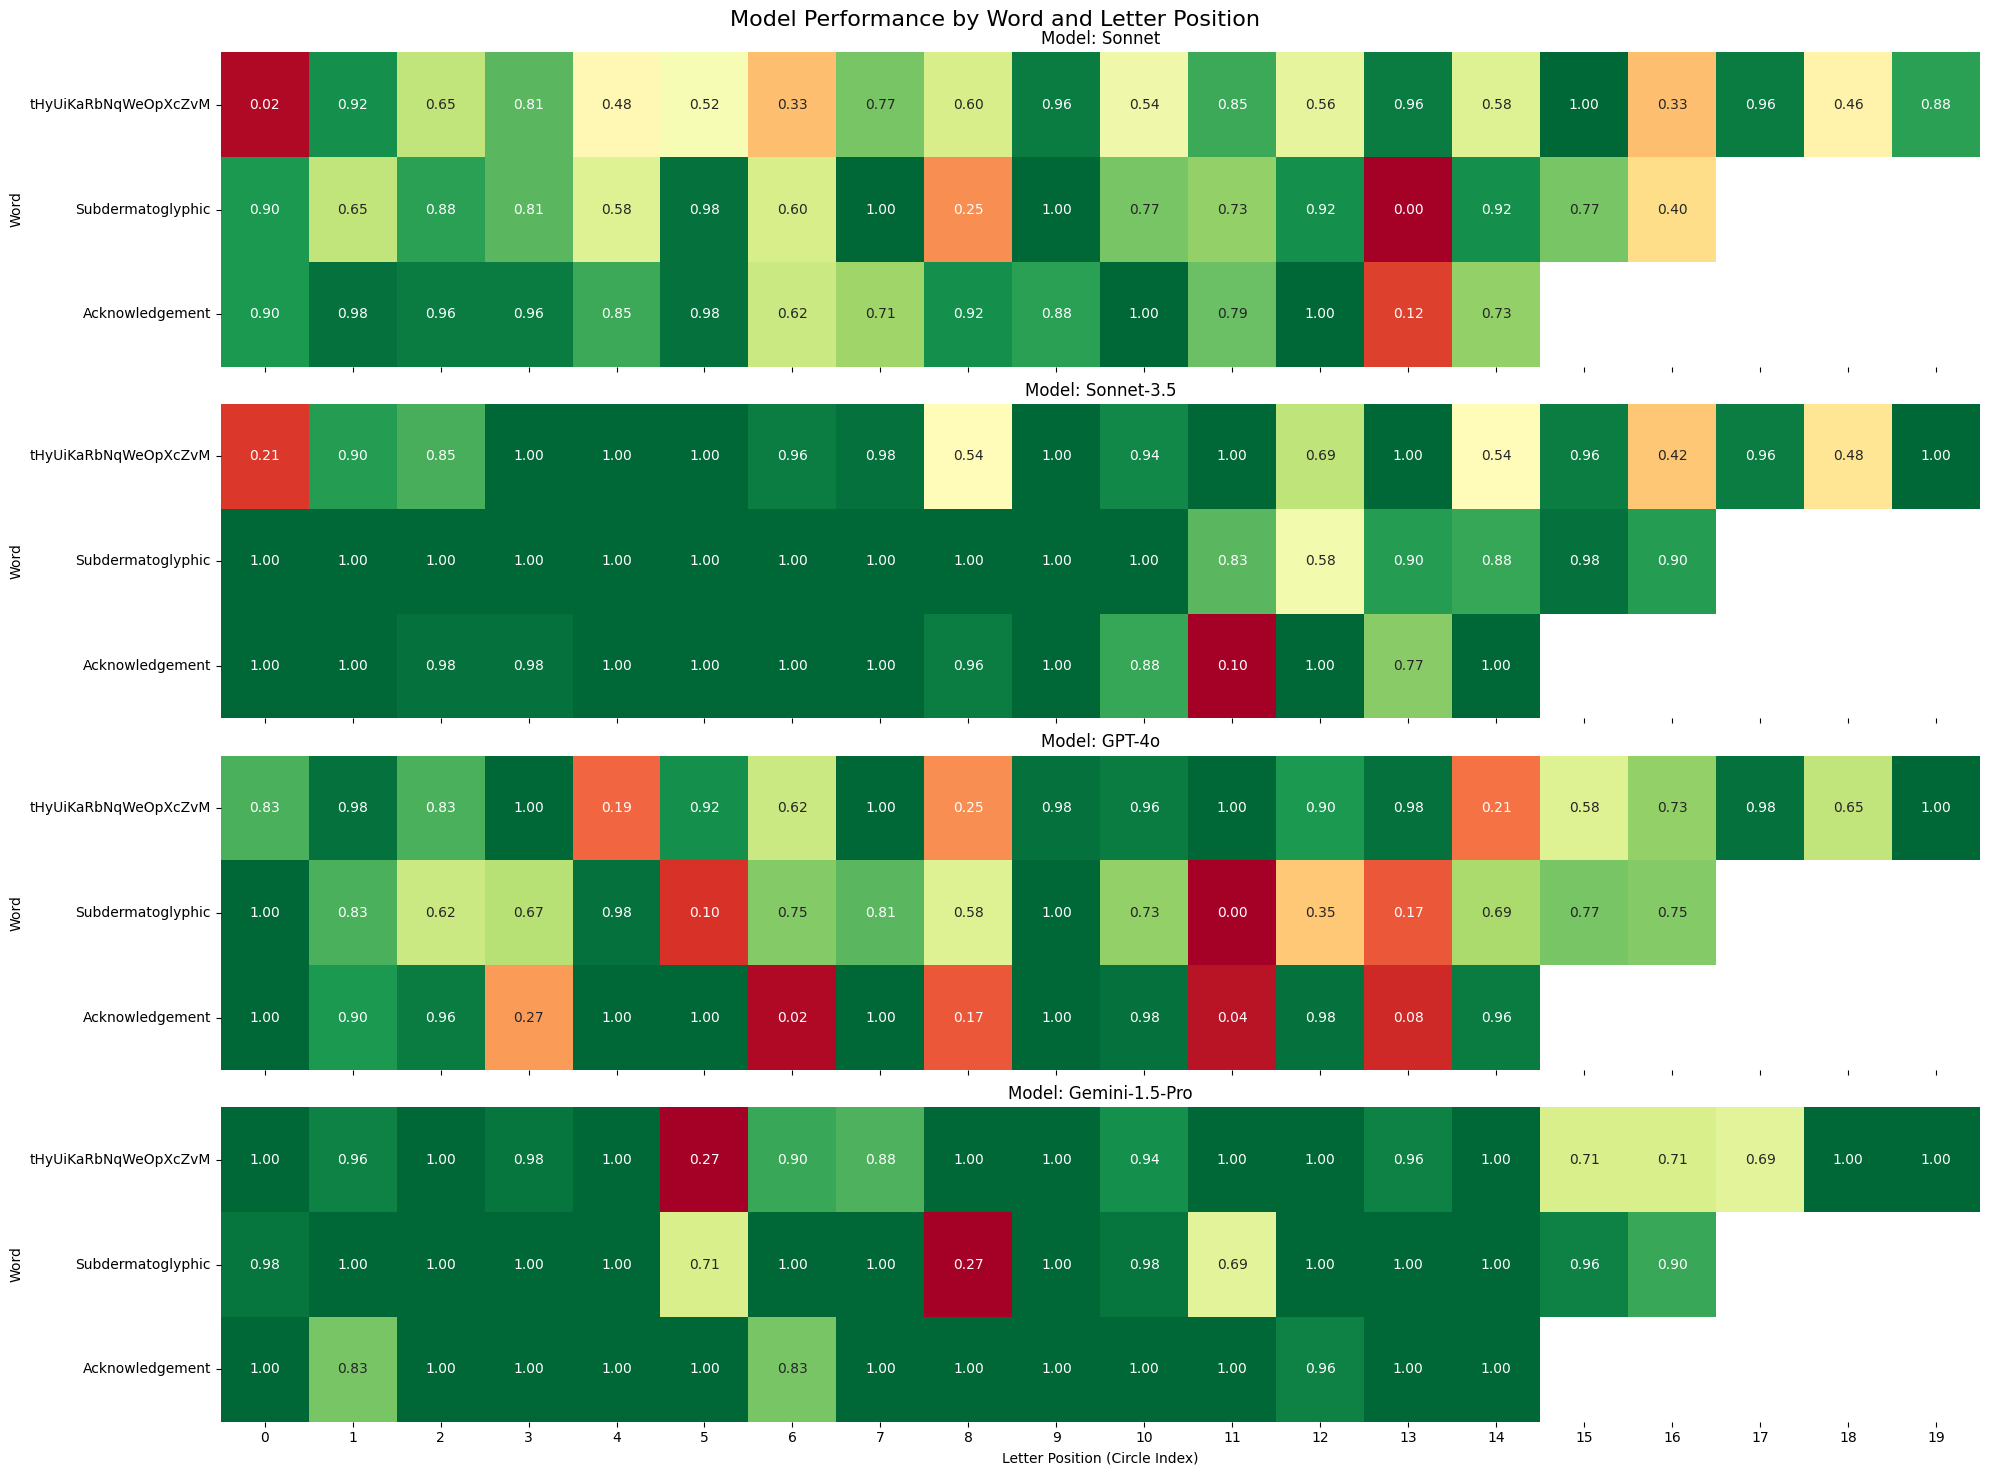

Top 5 most challenging words (lowest average accuracy across all models and positions):
word
tHyUiKaRbNqWeOpXcZvM    0.789583
Subdermatoglyphic       0.801471
Acknowledgement         0.850694
Name: is_prediction_correct, dtype: float64

Top 5 easiest words (highest average accuracy across all models and positions):
word
tHyUiKaRbNqWeOpXcZvM    0.789583
Subdermatoglyphic       0.801471
Acknowledgement         0.850694
Name: is_prediction_correct, dtype: float64

Model performance summary:
Model
Gemini-1.5-Pro    0.924679
Sonnet-3.5        0.887420
Sonnet            0.725561
GPT-4o            0.706731
Name: is_prediction_correct, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def crop_white(image, margin=10):
    # Convert image to numpy array
    img_array = np.array(image)

    # Find non-white pixels
    non_white = img_array[:, :, :3] != 255

    # Get bounding box of non-white pixels
    points = np.argwhere(non_white.any(axis=2))
    top, left = points.min(axis=0)
    bottom, right = points.max(axis=0)

    # Add margin
    top = max(0, top - margin)
    left = max(0, left - margin)
    bottom = min(img_array.shape[0], bottom + margin)
    right = min(img_array.shape[1], right + margin)

    # Crop the image
    return image.crop((left, top, right, bottom))


# Calculate accuracy rate for each combination of model, word, and circle_index
accuracy_rate = (
    df.groupby(["Model", "word", "circle_index"])["is_prediction_correct"]
    .mean()
    .reset_index()
)

# Get unique words and models
words = df["word"].unique()
models = df["Model"].unique()

# Sort words by average accuracy across all models
word_avg_accuracy = (
    accuracy_rate.groupby("word")["is_prediction_correct"]
    .mean()
    .sort_values(ascending=True)
)
sorted_words = word_avg_accuracy.index.tolist()

# Set up the plot
fig, axes = plt.subplots(len(models), 1, figsize=(20, 3.75 * len(models)), sharex=True)
fig.suptitle("Model Performance by Word and Letter Position", fontsize=16)

# Plot heatmap for each model
for i, model in enumerate(models):
    model_data = accuracy_rate[accuracy_rate["Model"] == model]
    pivot_data = model_data.pivot(
        index="word", columns="circle_index", values="is_prediction_correct"
    )
    pivot_data = pivot_data.reindex(sorted_words)  # Reorder rows based on sorted words

    sns.heatmap(
        pivot_data, ax=axes[i], cmap="RdYlGn", annot=True, fmt=".2f", cbar=False
    )
    axes[i].set_title(f"Model: {model}")
    axes[i].set_ylabel("Word")

    if i == len(models) - 1:
        axes[i].set_xlabel("Letter Position (Circle Index)")
    else:
        axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

# Print summary statistics
print(
    "Top 5 most challenging words (lowest average accuracy across all models and positions):"
)
print(word_avg_accuracy.head())

print(
    "\nTop 5 easiest words (highest average accuracy across all models and positions):"
)
print(word_avg_accuracy.tail())

print("\nModel performance summary:")
model_performance = (
    accuracy_rate.groupby("Model")["is_prediction_correct"]
    .mean()
    .sort_values(ascending=False)
)
print(model_performance)

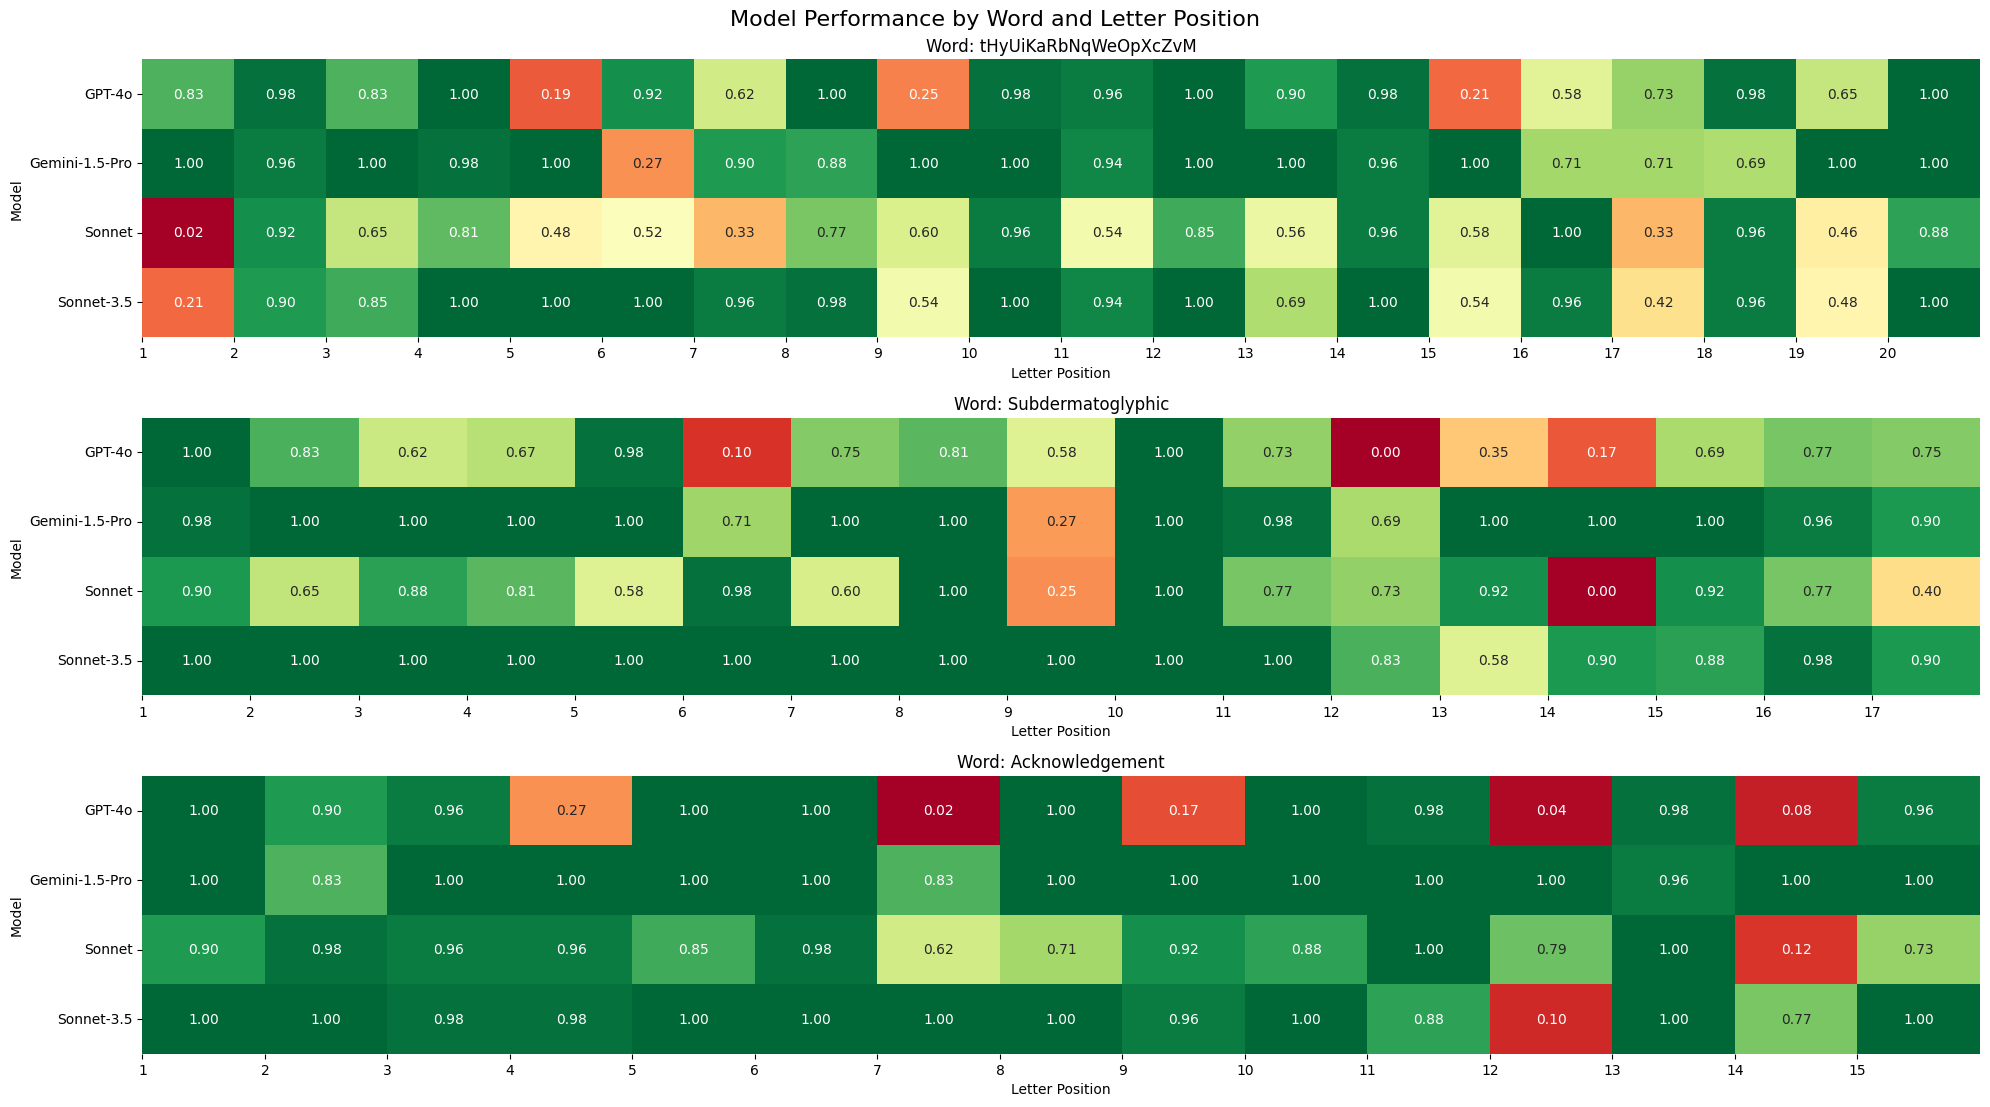

Top 5 most challenging words (lowest average accuracy across all models and positions):
word
tHyUiKaRbNqWeOpXcZvM    0.789583
Subdermatoglyphic       0.801471
Acknowledgement         0.850694
Name: is_prediction_correct, dtype: float64

Top 5 easiest words (highest average accuracy across all models and positions):
word
tHyUiKaRbNqWeOpXcZvM    0.789583
Subdermatoglyphic       0.801471
Acknowledgement         0.850694
Name: is_prediction_correct, dtype: float64

Model performance summary:
Model
Gemini-1.5-Pro    0.924679
Sonnet-3.5        0.887420
Sonnet            0.725561
GPT-4o            0.706731
Name: is_prediction_correct, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate accuracy rate for each combination of model, word, and circle_index
accuracy_rate = (
    df.groupby(["Model", "word", "circle_index"])["is_prediction_correct"]
    .mean()
    .reset_index()
)

# Get unique words and models
words = df["word"].unique()
models = df["Model"].unique()

# Sort words by average accuracy across all models
word_avg_accuracy = (
    accuracy_rate.groupby("word")["is_prediction_correct"]
    .mean()
    .sort_values(ascending=True)
)
sorted_words = word_avg_accuracy.index.tolist()

# Set up the plot
n_words = len(sorted_words)
fig, axes = plt.subplots(n_words, 1, figsize=(20, 3.75 * n_words), sharex=False)
fig.suptitle("Model Performance by Word and Letter Position", fontsize=16)

# Plot heatmap for each word
for i, word in enumerate(sorted_words):
    word_data = accuracy_rate[accuracy_rate["word"] == word]
    pivot_data = word_data.pivot(
        index="Model", columns="circle_index", values="is_prediction_correct"
    )

    sns.heatmap(
        pivot_data, ax=axes[i], cmap="RdYlGn", annot=True, fmt=".2f", cbar=False
    )
    axes[i].set_title(f"Word: {word}")
    axes[i].set_ylabel("Model")
    axes[i].set_xlabel("Letter Position")

    # Set x-axis ticks to match word length
    axes[i].set_xticks(range(len(word)))
    axes[i].set_xticklabels(range(1, len(word) + 1))

plt.tight_layout()
plt.show()

# Print summary statistics
print(
    "Top 5 most challenging words (lowest average accuracy across all models and positions):"
)
print(word_avg_accuracy.head())

print(
    "\nTop 5 easiest words (highest average accuracy across all models and positions):"
)
print(word_avg_accuracy.tail())

print("\nModel performance summary:")
model_performance = (
    accuracy_rate.groupby("Model")["is_prediction_correct"]
    .mean()
    .sort_values(ascending=False)
)
print(model_performance)

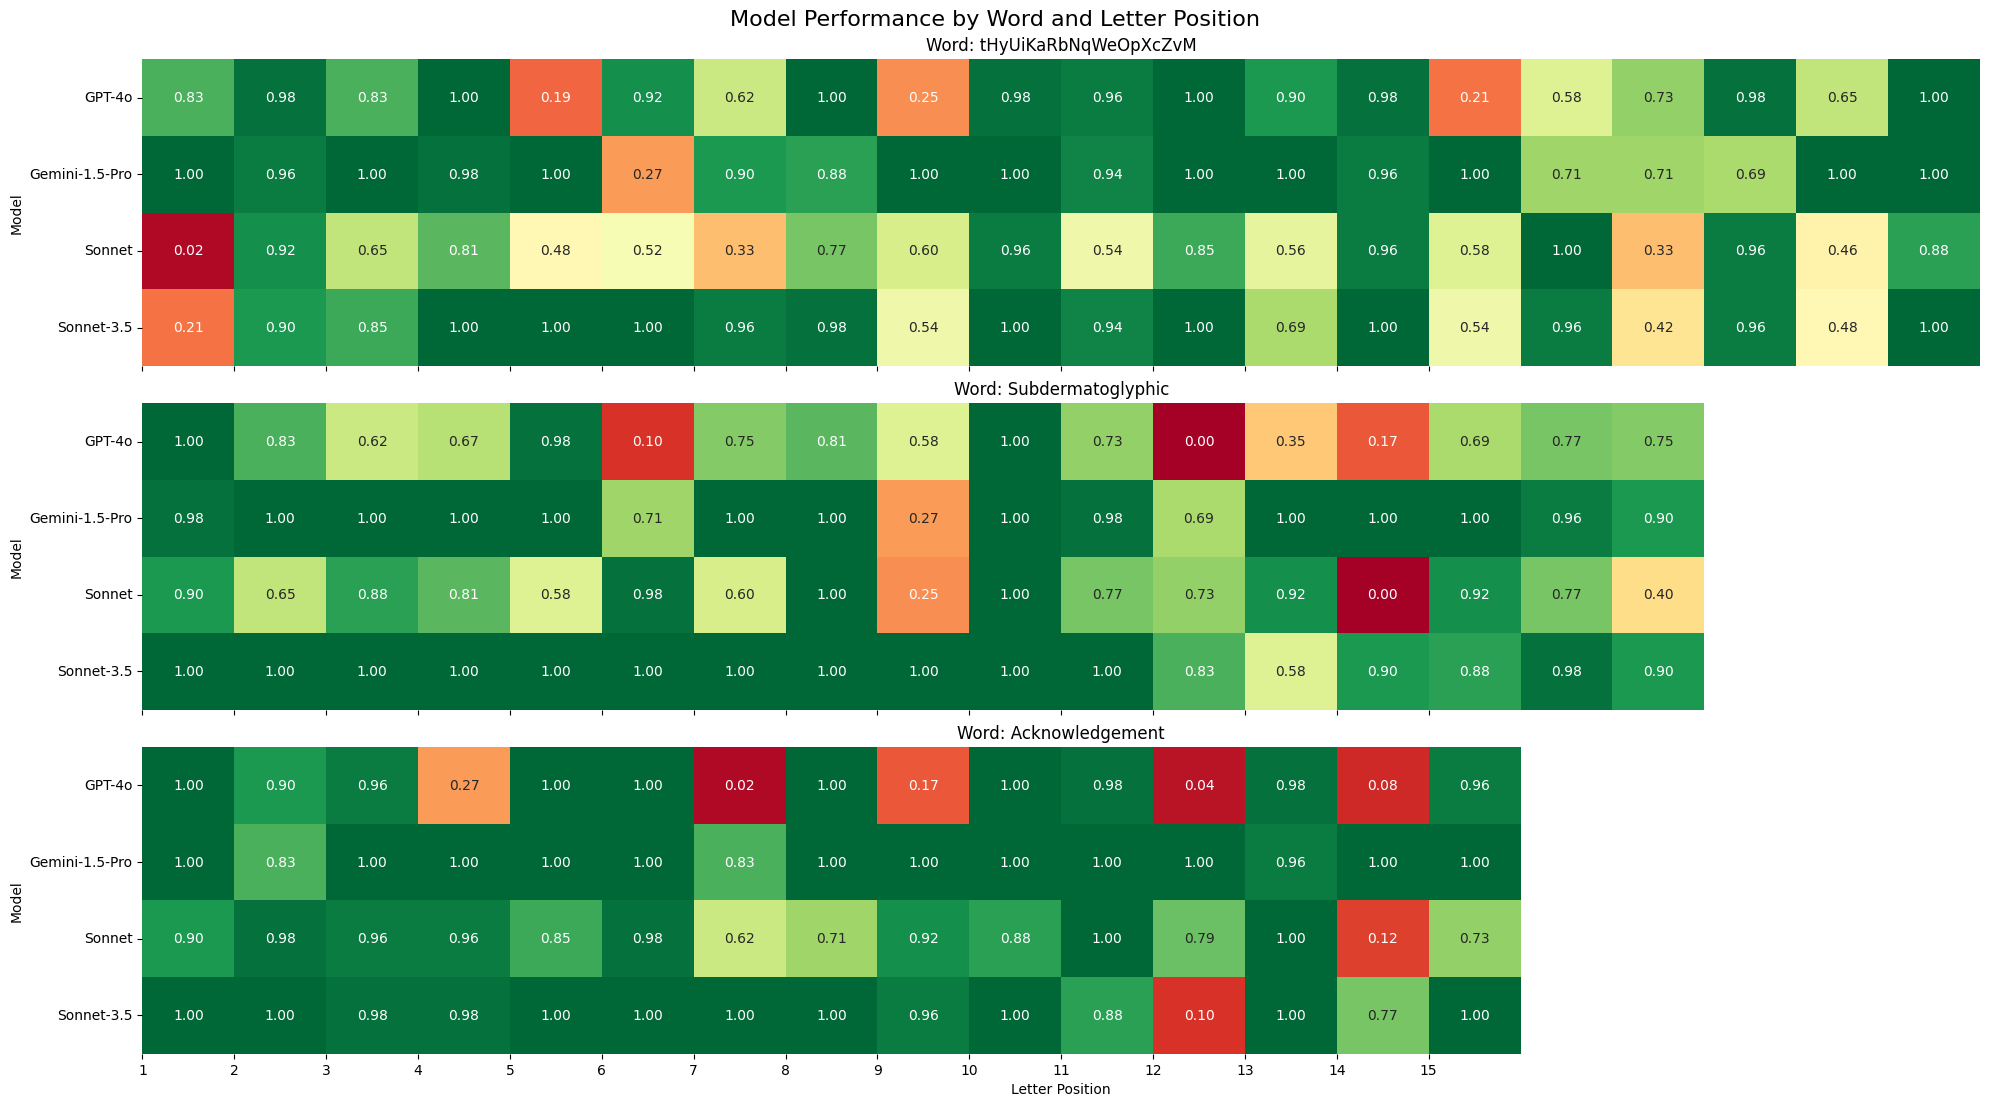

Top 5 most challenging words (lowest average accuracy across all models and positions):
word
tHyUiKaRbNqWeOpXcZvM    0.789583
Subdermatoglyphic       0.801471
Acknowledgement         0.850694
Name: is_prediction_correct, dtype: float64

Top 5 easiest words (highest average accuracy across all models and positions):
word
tHyUiKaRbNqWeOpXcZvM    0.789583
Subdermatoglyphic       0.801471
Acknowledgement         0.850694
Name: is_prediction_correct, dtype: float64

Model performance summary:
Model
Gemini-1.5-Pro    0.924679
Sonnet-3.5        0.887420
Sonnet            0.725561
GPT-4o            0.706731
Name: is_prediction_correct, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate accuracy rate for each combination of model, word, and circle_index
accuracy_rate = (
    df.groupby(["Model", "word", "circle_index"])["is_prediction_correct"]
    .mean()
    .reset_index()
)

# Get unique words and models
words = df["word"].unique()
models = df["Model"].unique()

# Sort words by average accuracy across all models
word_avg_accuracy = (
    accuracy_rate.groupby("word")["is_prediction_correct"]
    .mean()
    .sort_values(ascending=True)
)
sorted_words = word_avg_accuracy.index.tolist()

# Find the maximum word length
max_word_length = max(len(word) for word in words)

# Set up the plot
n_words = len(sorted_words)
fig, axes = plt.subplots(n_words, 1, figsize=(20, 3.75 * n_words), sharex=True)
fig.suptitle("Model Performance by Word and Letter Position", fontsize=16)

# Plot heatmap for each word
for i, word in enumerate(sorted_words):
    word_data = accuracy_rate[accuracy_rate["word"] == word]
    pivot_data = word_data.pivot(
        index="Model", columns="circle_index", values="is_prediction_correct"
    )

    # Pad the pivot_data with NaN values to match max_word_length
    pivot_data = pivot_data.reindex(columns=range(max_word_length), fill_value=np.nan)

    sns.heatmap(
        pivot_data,
        ax=axes[i],
        cmap="RdYlGn",
        annot=True,
        fmt=".2f",
        cbar=False,
        mask=pivot_data.isnull(),
        vmin=0,
        vmax=1,
    )
    axes[i].set_title(f"Word: {word}")
    axes[i].set_ylabel("Model")

    # Set x-axis ticks to match word length
    axes[i].set_xticks(range(len(word)))
    axes[i].set_xticklabels(range(1, len(word) + 1))

    # Remove x-axis label for all but the last subplot
    if i < n_words - 1:
        axes[i].set_xlabel("")
    else:
        axes[i].set_xlabel("Letter Position")

plt.tight_layout()
plt.show()

# Print summary statistics
print(
    "Top 5 most challenging words (lowest average accuracy across all models and positions):"
)
print(word_avg_accuracy.head())

print(
    "\nTop 5 easiest words (highest average accuracy across all models and positions):"
)
print(word_avg_accuracy.tail())

print("\nModel performance summary:")
model_performance = (
    accuracy_rate.groupby("Model")["is_prediction_correct"]
    .mean()
    .sort_values(ascending=False)
)
print(model_performance)

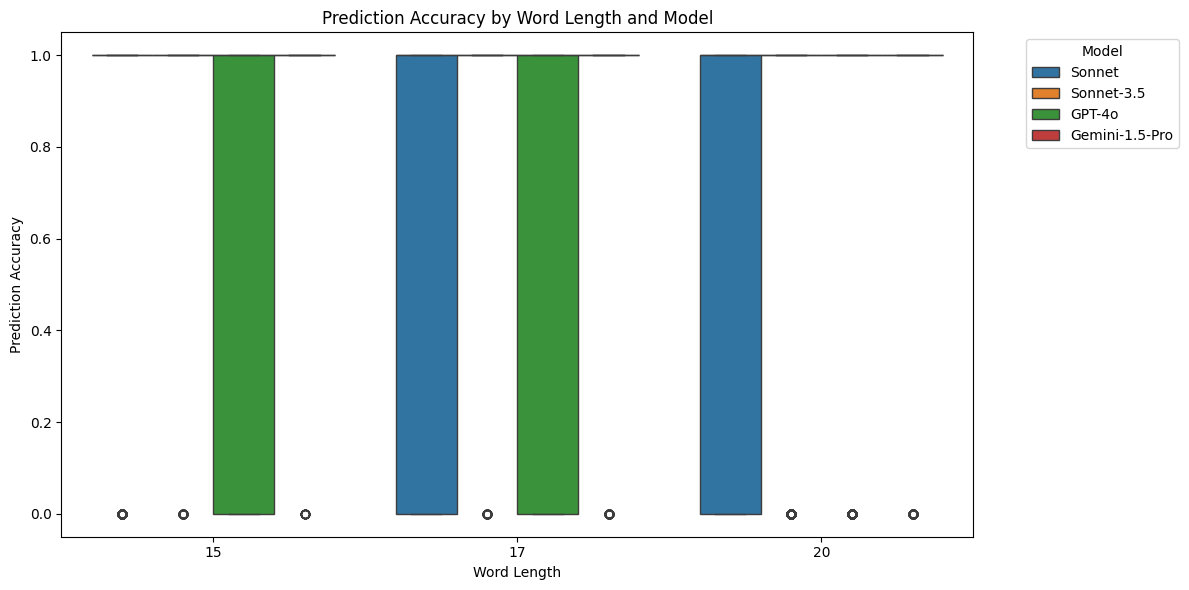

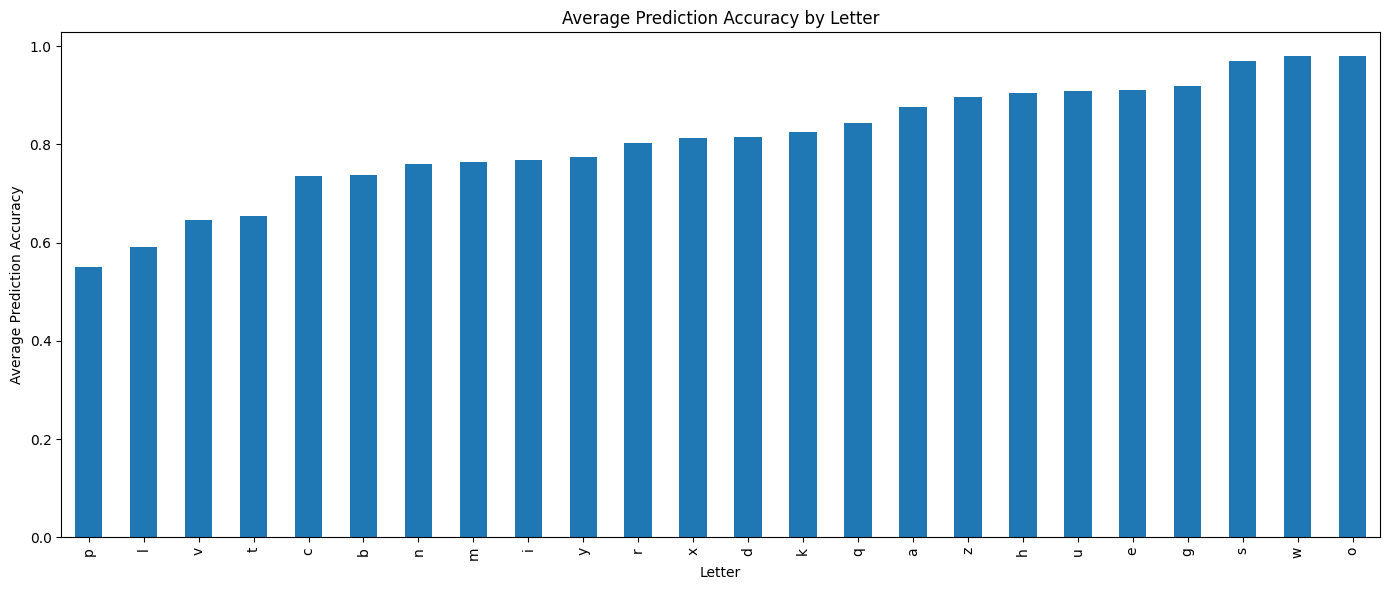

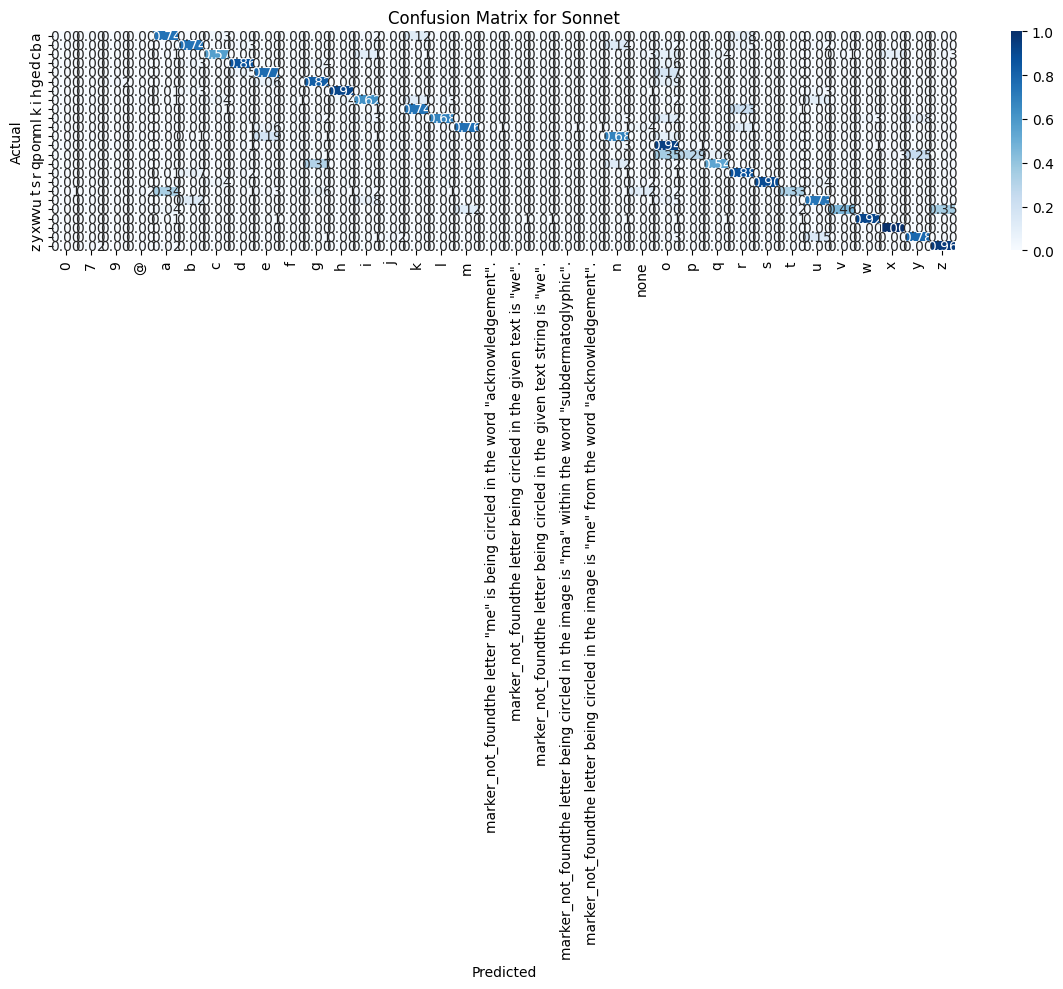

/var/folders/y1/b5wjnkp96_b7cvzncx0zsry40000gn/T/ipykernel_92199/2660547926.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


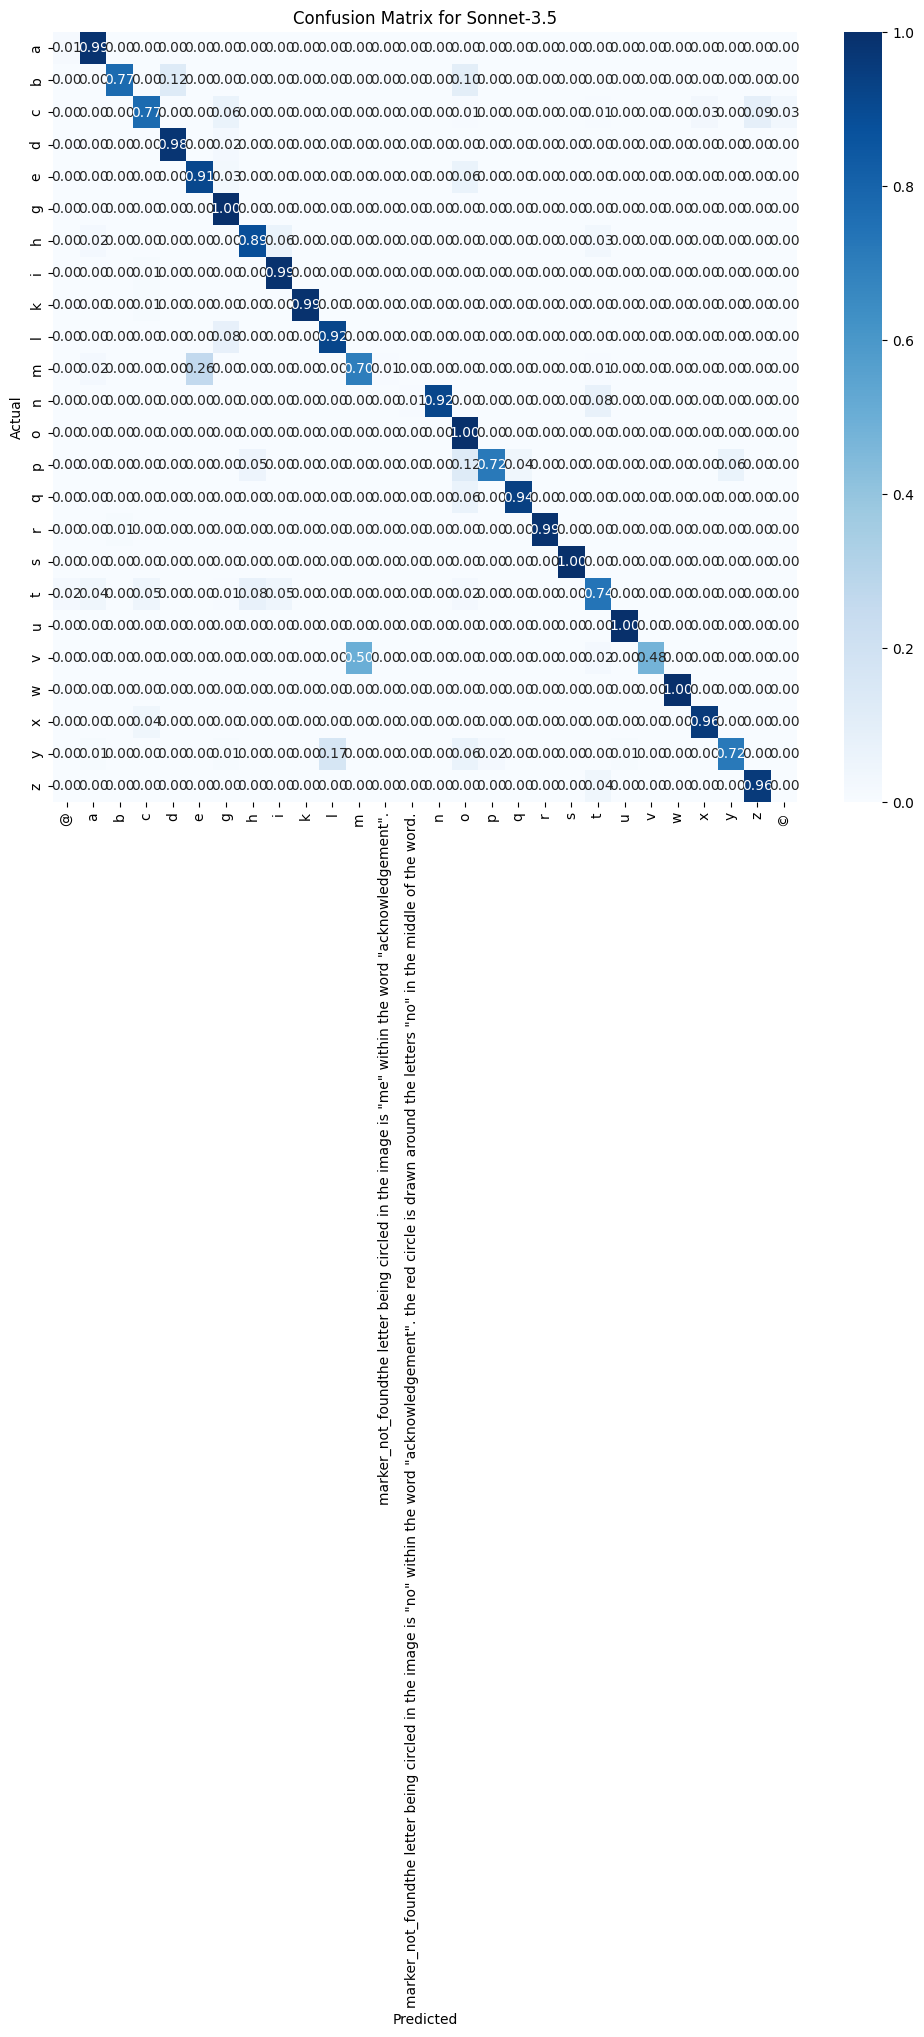

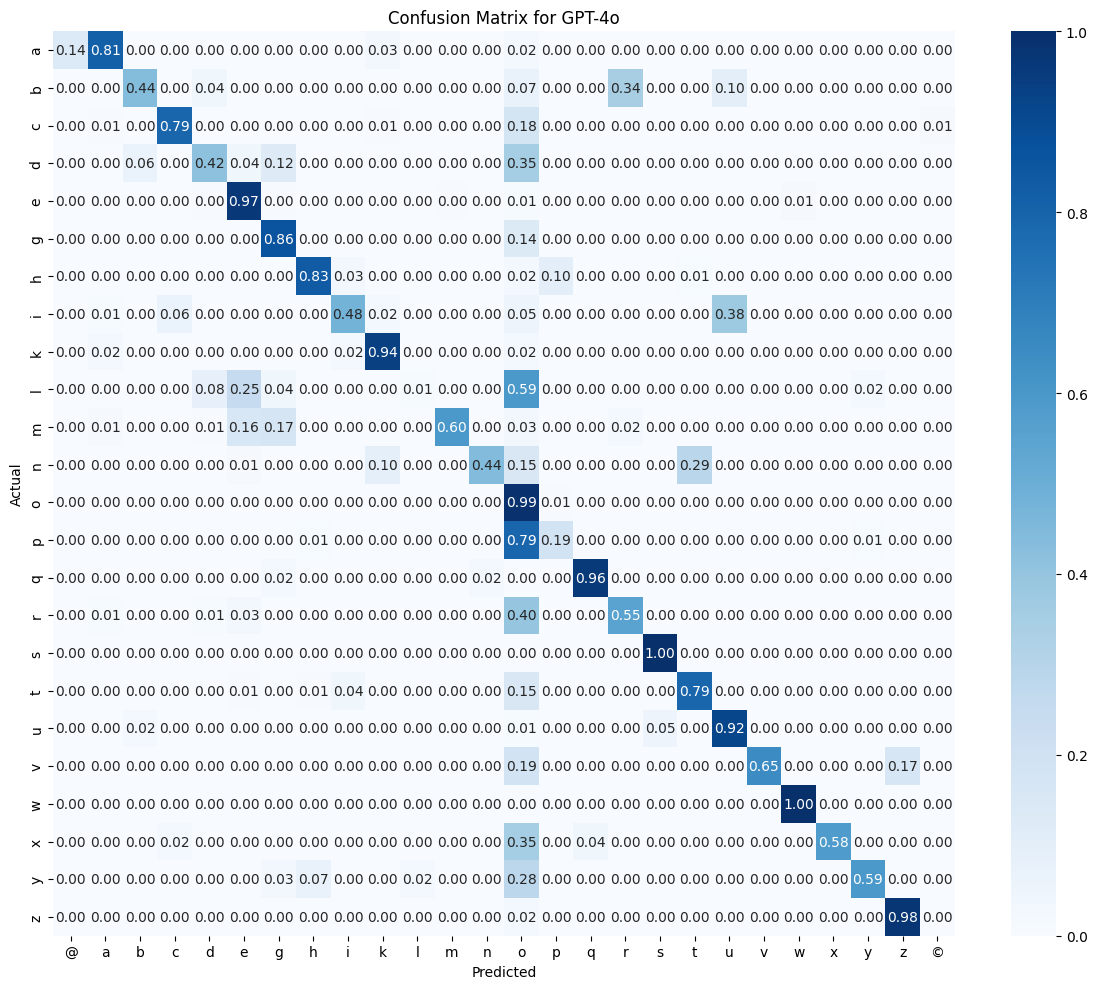

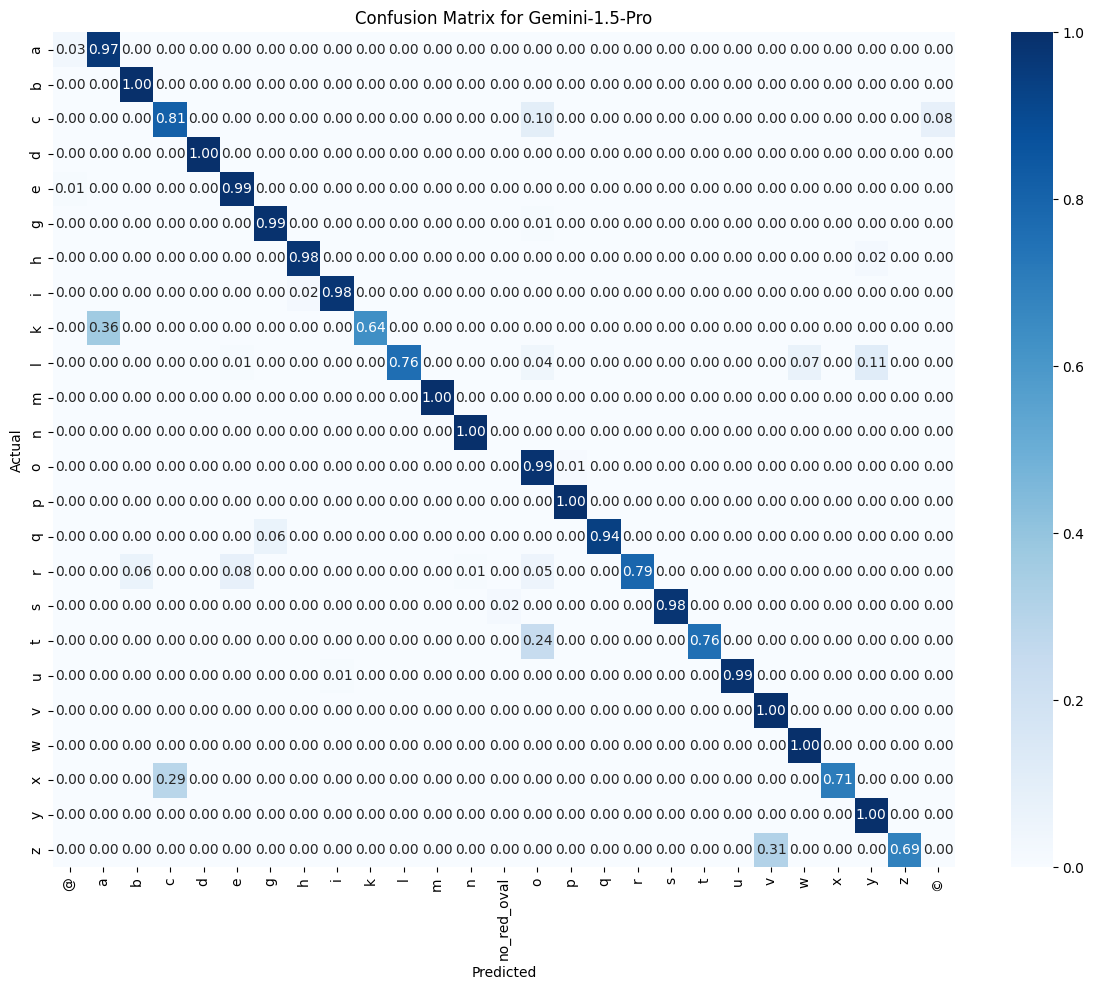

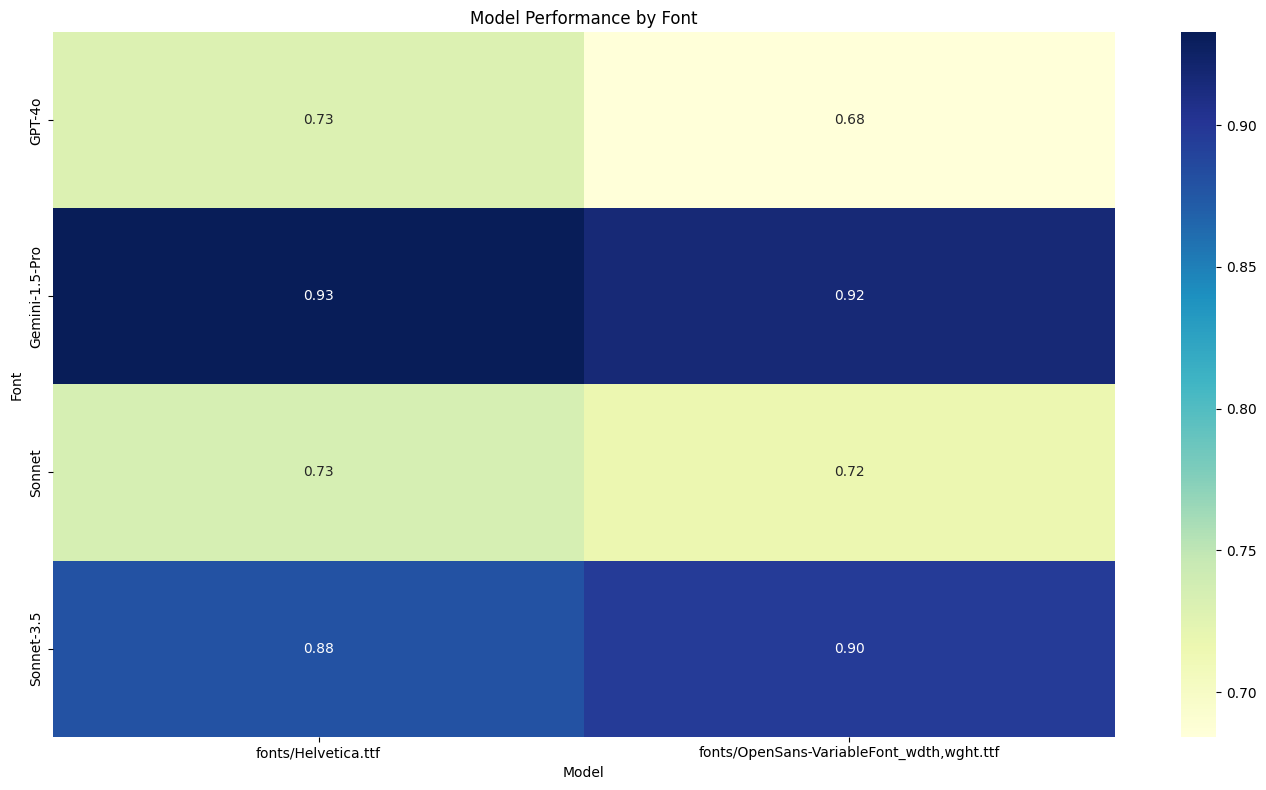

T-test p-value between Sonnet and Sonnet-3.5: 0.0000
T-test p-value between Sonnet and GPT-4o: 0.1402
T-test p-value between Sonnet and Gemini-1.5-Pro: 0.0000
T-test p-value between Sonnet-3.5 and GPT-4o: 0.0000
T-test p-value between Sonnet-3.5 and Gemini-1.5-Pro: 0.0000
T-test p-value between GPT-4o and Gemini-1.5-Pro: 0.0000


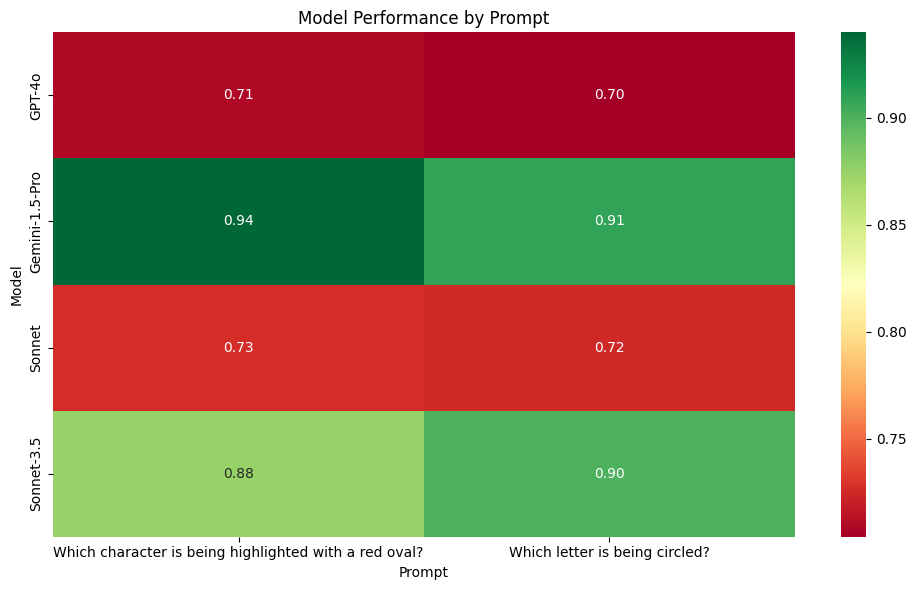

Top 10 most common errors across all models:
              Model gt predicted  count
50           GPT-4o  p         o     76
36           GPT-4o  l         o     57
183          Sonnet  t         a     49
120          Sonnet  e         o     42
47           GPT-4o  n         t     42
235      Sonnet-3.5  m         e     38
57           GPT-4o  r         o     38
29           GPT-4o  i         u     36
82   Gemini-1.5-Pro  k         a     35
94   Gemini-1.5-Pro  t         o     35


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 1. Word length analysis
df["word_length"] = df["word"].str.len()

plt.figure(figsize=(12, 6))
sns.boxplot(x="word_length", y="is_prediction_correct", hue="Model", data=df)
plt.title("Prediction Accuracy by Word Length and Model")
plt.xlabel("Word Length")
plt.ylabel("Prediction Accuracy")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 2. Letter frequency analysis
letter_freq = df.groupby("gt")["is_prediction_correct"].mean().sort_values()
plt.figure(figsize=(14, 6))
letter_freq.plot(kind="bar")
plt.title("Average Prediction Accuracy by Letter")
plt.xlabel("Letter")
plt.ylabel("Average Prediction Accuracy")
plt.tight_layout()
plt.show()

# 3. Confusion matrix for each model
for model in df["Model"].unique():
    model_df = df[df["Model"] == model]
    cm = pd.crosstab(model_df["gt"], model_df["predicted"], normalize="index")
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"Confusion Matrix for {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# 4. Performance by font
font_performance = (
    df.groupby(["Model", "font_path"])["is_prediction_correct"].mean().unstack()
)
plt.figure(figsize=(14, 8))
sns.heatmap(font_performance, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Model Performance by Font")
plt.xlabel("Model")
plt.ylabel("Font")
plt.tight_layout()
plt.show()

# 5. Statistical tests
models = df["Model"].unique()
for i in range(len(models)):
    for j in range(i + 1, len(models)):
        model1 = models[i]
        model2 = models[j]
        accuracy1 = df[df["Model"] == model1]["is_prediction_correct"]
        accuracy2 = df[df["Model"] == model2]["is_prediction_correct"]
        _, p_value = stats.ttest_ind(accuracy1, accuracy2)
        print(f"T-test p-value between {model1} and {model2}: {p_value:.4f}")

# 6. Performance by prompt
prompt_performance = (
    df.groupby(["Model", "prompt"])["is_prediction_correct"].mean().unstack()
)
plt.figure(figsize=(10, 6))
sns.heatmap(prompt_performance, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title("Model Performance by Prompt")
plt.xlabel("Prompt")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# 7. Error analysis
error_df = df[df["is_prediction_correct"] == False]
error_analysis = (
    error_df.groupby(["Model", "gt", "predicted"]).size().reset_index(name="count")
)
error_analysis = error_analysis.sort_values("count", ascending=False)
print("Top 10 most common errors across all models:")
print(error_analysis.head(10))

# 8. Performance over time (if applicable)
if "timestamp" in df.columns:
    df["date"] = pd.to_datetime(df["timestamp"]).dt.date
    time_performance = (
        df.groupby(["Model", "date"])["is_prediction_correct"].mean().unstack()
    )
    plt.figure(figsize=(14, 8))
    time_performance.plot(marker="o")
    plt.title("Model Performance Over Time")
    plt.xlabel("Date")
    plt.ylabel("Accuracy")
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

In [ ]:
display(accuracy_per_model_and_word.reset_index())

In [ ]:
# average over models
accuracy_per_model_and_word.groupby("Model").mean()

In [ ]:
# pivot on word and have different columns for Model and is_prediction_correct
accuracy_per_model_and_word.reset_index().pivot(
    index="word", columns="Model", values="is_prediction_correct"
)

In [ ]:
# conver both gt and predicted to lower case
df["gt"] = df["gt"].apply(lambda x: x.lower())
df["predicted"] = df["predicted"].apply(lambda x: x.lower())
df["is_prediction_correct"] = df["gt"] == df["predicted"]

# Group by model, word, and prompt, then calculate the accuracy
accuracy_per_model_word_prompt = df.groupby(["Model", "word", "prompt"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_word_prompt = accuracy_per_model_word_prompt * 100
# round 2 decimal places
accuracy_per_model_word_prompt = accuracy_per_model_word_prompt.round(2)

display(accuracy_per_model_word_prompt.reset_index())

In [ ]:
90.83
91.39
94.61
94.36
78.96
85.21

In [ ]:
# calcualte accuracy per model on all words
accuracy_per_model = df.groupby("Model")["is_prediction_correct"].mean()
accuracy_per_model = accuracy_per_model * 100
accuracy_per_model = accuracy_per_model.round(2)
print(accuracy_per_model)

In [ ]:
print(accuracy_per_model_and_word.to_latex())

In [ ]:
# get average per model
accuracy_per_model_and_word.groupby("Model").mean()

In [ ]:
# Assuming 'df' has a column named 'font' that contains the font information for each entry.

# Group by model, word, and font, then calculate the accuracy
accuracy_per_model_word_font = df.groupby(["Model", "word", "font_path"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and round to 2 decimal places
accuracy_per_model_word_font = (accuracy_per_model_word_font * 100).round(2)

accuracy_per_model_word_font

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' has a column named 'font' that contains the font information for each entry.

# Group by model, word, and font, then calculate the accuracy
accuracy_per_model_word_font = df.groupby(["Model", "word", "font_path"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and round to 2 decimal places
accuracy_per_model_word_font = (accuracy_per_model_word_font * 100).round(2)

# Plotting
accuracy_per_model_word_font.unstack().plot(kind="bar", figsize=(14, 7))
plt.title("Accuracy per Model, Word, and Font")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model and Word")
plt.xticks(rotation=45)
plt.legend(title="Font Path", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'df' has a column named 'font' that contains the font information for each entry.

# Group by model, word, and font, then calculate the accuracy
accuracy_per_model_word_font = df.groupby(["Model", "word", "font_path"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and round to 2 decimal places
accuracy_per_model_word_font = (accuracy_per_model_word_font * 100).round(2)

# Calculate average accuracy per font
average_accuracy_per_font = (
    df.groupby("font_path")["is_prediction_correct"].mean() * 100
)
average_accuracy_per_font = average_accuracy_per_font.round(2)

# Calculate average accuracy per font and model
average_accuracy_per_font_model = (
    df.groupby(["Model", "font_path"])["is_prediction_correct"].mean() * 100
)
average_accuracy_per_font_model = average_accuracy_per_font_model.round(2)

# Display the results
print("Average Accuracy per Font:")
display(average_accuracy_per_font.reset_index())
print("\nAverage Accuracy per Font and Model:")
display(average_accuracy_per_font_model.reset_index())

In [ ]:
# Group by gt, word, and model, then calculate the accuracy
accuracy_per_gt_word_model = df.groupby(["gt", "word", "Model"])[
    "is_prediction_correct"
].mean()

# Convert the accuracy to percentage and round to 2 decimal places
accuracy_per_gt_word_model = (accuracy_per_gt_word_model * 100).round(2)

# Find the hardest gt per word and model (lowest average accuracy)
hardest_gt_per_word_model = (
    accuracy_per_gt_word_model.reset_index()
    .groupby(["word", "Model"])
    .apply(lambda x: x.nsmallest(3, "is_prediction_correct"))
)

# Display the results
print("Hardest GT per Word and Model:")
display(hardest_gt_per_word_model)

In [ ]:
accuracy_per_gt_word_model

In [ ]:
df["gt"].value_counts()

In [ ]:
df

In [ ]:
accuracy_per_model_word_prompt.reset_index()

In [ ]:
prompt_labels = {
    "Which character is being highlighted with a red oval?": "Prompt 2",
    "Which letter is being circled?": "Prompt 1",
}

# Calculate accuracy and reshape DataFrame
accuracy_per_model_prompt_thickness = df.groupby(["Model", "prompt", "word"])[
    "is_prediction_correct"
].mean()
accuracy_per_model_prompt_thickness = (accuracy_per_model_prompt_thickness * 100).round(
    2
)

# Create a pivot table with models as columns, and line thickness as rows
pivot_df = accuracy_per_model_prompt_thickness.reset_index()
pivot_df["prompt"] = pivot_df["prompt"].map(
    prompt_labels
)  # Map full prompt text to simplified labels
pivot_table = pivot_df.pivot_table(
    index="word", columns=["Model", "prompt"], values="is_prediction_correct"
)

# Display the pivot table
pivot_table

In [ ]:
print(pivot_table.to_latex())

# Qualitative Samples

In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap


# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs_with_images(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[
            (df["Model"] == model) & (df["is_prediction_correct"] == True)
        ]
        incorrect_predictions = df[
            (df["Model"] == model) & (df["is_prediction_correct"] == False)
        ]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(4, random_state=1123)
        sample_incorrect = incorrect_predictions.sample(4, random_state=1123)

        # Combine samples for display
        samples = pd.concat([sample_correct, sample_incorrect])

        # Setup plot
        _, axs = plt.subplots(2, 4, figsize=(24, 8))  # 2 rows, 4 columns
        axs = axs.flatten()  # Flatten to 1D array for easier indexing

        for idx, (ax, (_, row)) in enumerate(zip(axs, samples.iterrows())):
            img_path = f"./{row['image_path']}"
            image = Image.open(img_path)
            ax.imshow(image)
            ax.axis("off")  # Turn off axis
            # add gt to the title

            ax.set_title(
                f"{'Correct' if row['is_prediction_correct'] else 'Incorrect'}"
                + f" GT: {row['gt']}"
                + "\n\n"
                + f" Pred: {row['predicted']}",
                fontsize=10,
            )

            # Wrap text to fit under the image
            wrapped_text = textwrap.fill(row["model-output-raw"], width=50)
            ax.text(
                0.5,
                -0.1,
                wrapped_text,
                fontsize=9,
                ha="center",
                va="top",
                transform=ax.transAxes,
            )

        plt.tight_layout()
        plt.show()


# Call the function
display_model_outputs_with_images(df)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import textwrap


# Function to display samples of correct and incorrect predictions for each model
def display_model_outputs_with_images(df):
    models = df["Model"].unique()
    for model in models:
        print(f"Model: {model}")
        correct_predictions = df[
            (df["Model"] == model) & (df["is_prediction_correct"] == True)
        ]
        incorrect_predictions = df[
            (df["Model"] == model) & (df["is_prediction_correct"] == False)
        ]

        # Sample 4 correct and 4 incorrect predictions
        sample_correct = correct_predictions.sample(
            4,
        )
        sample_incorrect = incorrect_predictions.sample(
            4,
        )

        # Combine samples for display
        samples = pd.concat([sample_correct, sample_incorrect])

        # Setup plot
        _, axs = plt.subplots(2, 4, figsize=(24, 8))  # 2 rows, 4 columns
        axs = axs.flatten()  # Flatten to 1D array for easier indexing

        for idx, (ax, (_, row)) in enumerate(zip(axs, samples.iterrows())):
            img_path = f"./{row['image_path']}"
            image = Image.open(img_path)
            ax.imshow(image)
            ax.axis("off")  # Turn off axis
            # add gt to the title

            ax.set_title(
                f"{'Correct' if row['is_prediction_correct'] else 'Incorrect'}"
                + f" GT: {row['gt']}"
                + "\n\n"
                + f" Pred: {row['predicted']}",
                fontsize=10,
            )

            # Wrap text to fit under the image
            wrapped_text = textwrap.fill(row["model-output-raw"], width=50)
            ax.text(
                0.5,
                -0.1,
                wrapped_text,
                fontsize=9,
                ha="center",
                va="top",
                transform=ax.transAxes,
            )

        plt.tight_layout()
        plt.show()


# Call the function
display_model_outputs_with_images(df)

# gemini wrong samples

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def display_gemini_incorrect_samples(df, num_samples=16):
    # Filter for Gemini-1.5-Pro incorrect predictions
    gemini_incorrect = df[
        (df["Model"] == "Gemini-1.5-Pro") & (df["is_prediction_correct"] == False)
    ]

    # Sample the required number of rows
    samples = gemini_incorrect.sample(n=num_samples, random_state=42)

    # Set up the plot
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.flatten()

    for idx, (_, row) in enumerate(samples.iterrows()):
        img_path = f"./{row['image_path']}"
        image = Image.open(img_path)

        axes[idx].imshow(image)
        axes[idx].axis("off")
        axes[idx].set_title(f"GT: {row['gt']}, Pred: {row['predicted']}", fontsize=10)

    plt.tight_layout()
    plt.show()


# Call the function
display_gemini_incorrect_samples(df)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def crop_white(image):
    # Convert image to numpy array
    img_array = np.array(image)

    # Find non-white pixels
    non_white = img_array[:, :, :3] != 255

    # Get bounding box of non-white pixels
    points = np.argwhere(non_white.any(axis=2))
    top, left = points.min(axis=0)
    bottom, right = points.max(axis=0)

    # Crop the image
    return image.crop((left, top, right, bottom))


def display_gemini_incorrect_samples(df, num_samples=16):
    # Filter for Gemini-1.5-Pro incorrect predictions
    gemini_incorrect = df[
        (df["Model"] == "Gemini-1.5-Pro") & (df["is_prediction_correct"] == False)
    ]

    # Sample the required number of rows
    samples = gemini_incorrect.sample(n=num_samples, random_state=42)

    # Set up the plot
    fig, axes = plt.subplots(4, 4, figsize=(14, 8))
    axes = axes.flatten()

    for idx, (_, row) in enumerate(samples.iterrows()):
        img_path = f"./{row['image_path']}"
        image = Image.open(img_path)

        # Crop the white area
        cropped_image = crop_white(image)

        axes[idx].imshow(cropped_image)
        axes[idx].axis("off")
        # axes[idx].set_title(f"GT: {row['gt']}, Pred: {row['predicted']}", fontsize=10)

    plt.tight_layout()
    plt.show()


# Call the function
display_gemini_incorrect_samples(df)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def crop_white(image, margin=10):
    # Convert image to numpy array
    img_array = np.array(image)

    # Find non-white pixels
    non_white = img_array[:, :, :3] != 255

    # Get bounding box of non-white pixels
    points = np.argwhere(non_white.any(axis=2))
    top, left = points.min(axis=0)
    bottom, right = points.max(axis=0)

    # Add margin
    top = max(0, top - margin)
    left = max(0, left - margin)
    bottom = min(img_array.shape[0], bottom + margin)
    right = min(img_array.shape[1], right + margin)

    # Crop the image
    return image.crop((left, top, right, bottom))


def display_gemini_incorrect_samples(df, save_name="", num_samples=16):
    # Filter for Gemini-1.5-Pro incorrect predictions
    gemini_incorrect = df[
        (df["Model"] == "Gemini-1.5-Pro") & (df["is_prediction_correct"] == False)
    ]

    # Sample the required number of rows
    samples = gemini_incorrect.sample(n=num_samples, random_state=42)

    # Set up the plot
    fig, axes = plt.subplots(4, 4, figsize=(18, 10))  # Increased figure height
    axes = axes.flatten()

    for idx, (_, row) in enumerate(samples.iterrows()):
        img_path = f"./{row['image_path']}"
        image = Image.open(img_path)

        # Crop the white area, keeping a margin
        cropped_image = crop_white(image, margin=12)

        axes[idx].imshow(cropped_image)
        axes[idx].axis("off")

        # Add text below the image
        axes[idx].text(
            0.5,
            -0.1,
            f"Prediction: {row['predicted']}",
            fontsize=12,
            ha="center",
            va="top",
            transform=axes[idx].transAxes,
        )

    plt.tight_layout()
    if save_name != "":
        plt.savefig(save_name, bbox_inches="tight", dpi=300, pad_inches=0, format="pdf")
    plt.show()


# Call the function
display_gemini_incorrect_samples(df)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd


def crop_white(image, margin=10):
    # Convert image to numpy array
    img_array = np.array(image)

    # Find non-white pixels
    non_white = img_array[:, :, :3] != 255

    # Get bounding box of non-white pixels
    points = np.argwhere(non_white.any(axis=2))
    top, left = points.min(axis=0)
    bottom, right = points.max(axis=0)

    # Add margin
    top = max(0, top - margin)
    left = max(0, left - margin)
    bottom = min(img_array.shape[0], bottom + margin)
    right = min(img_array.shape[1], right + margin)

    # Crop the image
    return image.crop((left, top, right, bottom))


def display_gemini_incorrect_samples(df, save_name="", num_rows=3, num_cols=4):
    # Filter for Gemini-1.5-Pro incorrect predictions
    gemini_incorrect = df[
        (df["Model"] == "Gemini-1.5-Pro") & (df["is_prediction_correct"] == False)
    ]

    # Get unique words with incorrect predictions
    unique_words = gemini_incorrect["word"].unique()

    # Set up the plot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3 * num_rows))
    axes = axes.flatten()

    # Iterate through unique words
    for idx, word in enumerate(unique_words[:num_rows]):
        samples = gemini_incorrect[gemini_incorrect["word"] == word].sample(n=num_cols)

        for col, (_, row) in enumerate(samples.iterrows()):
            ax_idx = idx * num_cols + col
            if ax_idx >= len(axes):
                break

            img_path = f"./{row['image_path']}"
            image = Image.open(img_path)

            # Crop the white area, keeping a margin
            cropped_image = crop_white(image, margin=12)

            axes[ax_idx].imshow(cropped_image)
            axes[ax_idx].axis("off")

            # Add text below the image
            axes[ax_idx].text(
                0.5,
                -0.1,
                f"Prediction: {row['predicted']}",
                fontsize=16,
                ha="center",
                va="top",
                transform=axes[ax_idx].transAxes,
            )

    plt.tight_layout()
    if save_name != "":
        plt.savefig(save_name, bbox_inches="tight", dpi=300, pad_inches=0, format="pdf")
    plt.show()


# Call the function
display_gemini_incorrect_samples(df, "gemini_failure_cases2.pdf")

In [ ]:
samples_for_word = gemini_incorrect.groupby("word").apply(lambda x: x.sample(n=10))

In [ ]:
samples_for_word["word"]

# Samples for the paper

In [ ]:
df_prompt1 = df[df["prompt"] == "Which character is being highlighted with a red oval?"]
df_prompt2 = df[df["prompt"] == "Which letter is being circled?"]
display(df_prompt1)
display(df_prompt2)

In [ ]:
import os
import pandas as pd
from PIL import Image
import shutil

# predicted	gt


# Function to find and save entries where at least two models failed
def save_failed_model_outputs(df, prompt_id):
    # Group by 'image_name' and filter where at least two 'is_prediction_correct' values are False
    # rename image_second_prompt to image in imahe_path
    df["image_path"] = df["image_path"].apply(
        lambda x: x.replace("image_second_prompt", "image")
    )
    failed_df = df.groupby("image_path").filter(
        lambda x: x["is_prediction_correct"].value_counts().get(False, 0) >= 2
    )
    print(f"Size of failed_df: {len(failed_df)}")
    # print unique model anmes
    print(f"Unique model names: {failed_df['Model'].unique()}")
    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least three models failed:")
        # display(failed_df)  # Displaying the DataFrame for review

        # group by image_name and show is_prediction_correct value for each model in a separate column (column names should be model names)
        pivoted_df = failed_df.pivot_table(
            index="image_path",
            columns="Model",
            values="is_prediction_correct",
            aggfunc="first",
        )

        # add a gpt-4o column with results of gpt-4o from the original df for each row
        # ADD CODE HERE
        # pivoted_df["GPT-4o"] = df[df["Model"] == "GPT-4o"].set_index("image_path")[
        #     "is_prediction_correct"
        # ]

        # Display the pivoted DataFrame
        # display(pivoted_df)
        # print unique models
        print(f"Unique model names: {pivoted_df.columns} in pivoted_df")

        # Create a directory for saving the images
        base_dir = "./qualitative"
        if not os.path.exists(base_dir):
            os.makedirs(base_dir)

        # Save images with new naming convention
        for image_name, group in failed_df.groupby("image_path"):
            details = [f"gt_{group.iloc[0]['gt']}"]  # Start with ground truth label

            for _, row in group.iterrows():
                details.append(f"{row['Model']}_{row['predicted']}")

            image_name_short = os.path.basename(image_name).replace(".png", "")

            detailed_filename = (
                "_".join(details)
                + "_"
                + image_name_short
                + "_prompt"
                + prompt_id
                + ".png"
            )
            img_path = f"{image_name}"
            new_filename = detailed_filename

            shutil.copy(img_path, os.path.join(base_dir, new_filename))

    else:
        print("No entries found where at least two models failed.")

In [ ]:
df_prompt2["image_path"] = df_prompt2["image_path"].apply(
    lambda x: x.replace("images_second_prompt", "images")
)
df_prompt2["image_path"] = df_prompt2["image_path"].apply(
    lambda x: x.replace("images_second_prompt", "images")
)

In [ ]:
df_prompt2

In [ ]:
save_failed_model_outputs(df_prompt2, "2")

In [ ]:
# Call the function
save_failed_model_outputs(df_prompt1, "1")

In [ ]:
df_prompt2.Model.unique()

In [ ]:
df_prompt2[df_prompt2["Model"] == "GPT-4o"]["is_prediction_correct"].mean()

In [ ]:
import os
import pandas as pd
from PIL import Image
import shutil

# predicted	gt


# Function to find and save entries where at least two models failed
def save_failed_model_outputs(df, prompt_id):
    # Group by 'image_name' and filter where at least two 'is_prediction_correct' values are False
    df["fname"] = df["image_path"].apply(lambda x: os.path.basename(x))

    failed_df = df.groupby("fname").filter(
        lambda x: x["is_prediction_correct"].value_counts().get(False, 0) >= 3
    )

    # candidate image_path
    candidate_image_path = failed_df["fname"].unique()

    # now filder df based on candidate_image_path
    failed_df = df[df["fname"].isin(candidate_image_path)]

    print(f"Size of failed_df: {len(failed_df)}")
    # print unique model anmes
    print(f"Unique model names: {failed_df['Model'].unique()}")
    # Check if there are any entries where at least two models failed
    if not failed_df.empty:
        print("Entries where at least three models failed:")
        # display(failed_df)  # Displaying the DataFrame for review

        # group by image_name and show is_prediction_correct value for each model in a separate column (column names should be model names)
        pivoted_df = failed_df.pivot_table(
            index="fname",
            columns="Model",
            values="is_prediction_correct",
            aggfunc="first",
        )

        print(f"Unique model names: {pivoted_df.columns} in pivoted_df")

        # Create a directory for saving the images
        base_dir = "./qualitative"
        if not os.path.exists(base_dir):
            os.makedirs(base_dir)

        # Save images with new naming convention
        for image_name, group in failed_df.groupby("fname"):
            display(group)
            details = [f"gt_{group.iloc[0]['gt']}"]  # Start with ground truth label
            # only save if we have all 4 models data for that row ['Sonnet' 'Sonnet-3.5' 'GPT-4o' 'Gemini-1.5-Pro']
            if set(group["Model"].unique().tolist()) == set(
                [
                    "Sonnet",
                    "Sonnet-3.5",
                    "GPT-4o",
                    "Gemini-1.5-Pro",
                ]
            ):
                for _, row in group.iterrows():
                    details.append(f"{row['Model']}_{row['predicted']}")

                image_name_short = os.path.basename(image_name).replace(".png", "")
                # get image_path from df
                full_image_path = group.iloc[0]["image_path"]

                detailed_filename = (
                    "_".join(details)
                    + "_"
                    + image_name_short
                    + "_prompt"
                    + prompt_id
                    + ".png"
                )
                img_path = f"./{full_image_path}"
                new_filename = detailed_filename

                shutil.copy(img_path, os.path.join(base_dir, new_filename))
            else:
                print(
                    f"Skipping {image_name} because it has only {group['Model'].unique().tolist()}"
                )

    else:
        print("No entries found where at least two models failed.")

In [ ]:
save_failed_model_outputs(df_prompt2, "2")

In [ ]:
df

In [ ]:
import os
import shutil
import random


def save_sample_images(df, num_samples=5):
    # Create parent directory
    parent_dir = "./qualitative"
    if not os.path.exists(parent_dir):
        os.makedirs(parent_dir)

    # Get unique models
    models = df["Model"].unique()

    for model in models:
        # Create model directory
        model_dir = os.path.join(parent_dir, model)
        os.makedirs(os.path.join(model_dir, "correct"), exist_ok=True)
        os.makedirs(os.path.join(model_dir, "incorrect"), exist_ok=True)

        # Get correct and incorrect predictions
        correct = df[(df["Model"] == model) & (df["is_prediction_correct"] == True)]
        incorrect = df[(df["Model"] == model) & (df["is_prediction_correct"] == False)]

        # Sample and save correct predictions
        for _, row in correct.sample(n=min(num_samples, len(correct))).iterrows():
            src_path = f"./{row['image_path']}"
            dst_path = os.path.join(
                model_dir,
                "correct",
                f"gt_{row['gt']}_pred_{row['predicted']}_{os.path.basename(row['image_path'])}",
            )
            shutil.copy(src_path, dst_path)

        # Sample and save incorrect predictions
        for _, row in incorrect.sample(n=min(num_samples, len(incorrect))).iterrows():
            src_path = f"./{row['image_path']}"
            dst_path = os.path.join(
                model_dir,
                "incorrect",
                f"gt_{row['gt']}_pred_{row['predicted']}_{os.path.basename(row['image_path'])}",
            )
            shutil.copy(src_path, dst_path)

    print("Sample images saved successfully!")


# Call the function
save_sample_images(df, num_samples=10)